In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

sns.set(style="whitegrid")
%matplotlib inline


train = pd.read_csv(r"C:\Users\jain1\Downloads\child-mind-institute-problematic-internet-use (1)\train.csv")
test = pd.read_csv(r"C:\Users\jain1\Downloads\child-mind-institute-problematic-internet-use (1)\test.csv")
data_dict = pd.read_csv(r"C:\Users\jain1\Downloads\child-mind-institute-problematic-internet-use (1)\data_dictionary.csv")

display(train.head())
print(f"Train shape: {train.shape}")

display(test.head())
print(f"Test shape: {test.shape}")

data_dict.head()



,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Train shape: (3960, 82)


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Test shape: (20, 59)


,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


In [2]:
def calculate_stats(data, columns):
    if isinstance(columns, str):
        columns = [columns]

    stats = []
    for col in columns:
        if data[col].dtype in ['object', 'category']:
            counts = data[col].value_counts(dropna=False, sort=False)
            percents = data[col].value_counts(normalize=True, dropna=False, sort=False) * 100
            formatted = counts.astype(str) + ' (' + percents.round(2).astype(str) + '%)'
            stats_col = pd.DataFrame({'count (%)': formatted})
            stats.append(stats_col)
        else:
            stats_col = data[col].describe().to_frame().transpose()
            stats_col['missing'] = data[col].isnull().sum()
            stats_col.index.name = col
            stats.append(stats_col)

    return pd.concat(stats, axis=0)


train_cols = set(train.columns)
test_cols = set(test.columns)
columns_not_in_test = sorted(list(train_cols - test_cols))
data_dict[data_dict['Field'].isin(columns_not_in_test)]

,Instrument,Field,Description,Type,Values,Value Labels
54,Parent-Child Internet Addiction Test,PCIAT-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
55,Parent-Child Internet Addiction Test,PCIAT-PCIAT_01,How often does your child disobey time limits ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
56,Parent-Child Internet Addiction Test,PCIAT-PCIAT_02,How often does your child neglect household ch...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
57,Parent-Child Internet Addiction Test,PCIAT-PCIAT_03,How often does your child prefer to spend time...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
58,Parent-Child Internet Addiction Test,PCIAT-PCIAT_04,How often does your child form new relationshi...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
59,Parent-Child Internet Addiction Test,PCIAT-PCIAT_05,How often do you complain about the amount of ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
60,Parent-Child Internet Addiction Test,PCIAT-PCIAT_06,How often do your child's grades suffer becaus...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
61,Parent-Child Internet Addiction Test,PCIAT-PCIAT_07,How often does your child check his or her e-m...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
62,Parent-Child Internet Addiction Test,PCIAT-PCIAT_08,How often does your child seem withdrawn from ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
63,Parent-Child Internet Addiction Test,PCIAT-PCIAT_09,How often does your child become defensive or ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."


In [3]:
pciat_min_max = train.groupby('sii')['PCIAT-PCIAT_Total'].agg(['min', 'max'])
pciat_min_max = pciat_min_max.rename(
    columns={'min': 'Minimum PCIAT total Score', 'max': 'Maximum total PCIAT Score'}
)
pciat_min_max

,Minimum PCIAT total Score,Maximum total PCIAT Score
sii,,
0.0,0.0,30.0
1.0,31.0,49.0
2.0,50.0,79.0
3.0,80.0,93.0


In [4]:
data_dict[data_dict['Field'] == 'PCIAT-PCIAT_Total']['Value Labels'].iloc[0]

'Severity Impairment Index: 0-30=None; 31-49=Mild; 50-79=Moderate; 80-100=Severe'

In [5]:
train_with_sii = train[train['sii'].notna()][columns_not_in_test]
train_with_sii[train_with_sii.isna().any(axis=1)].head().style.applymap(
    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''
)

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,PCIAT-Season,sii
24,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,nan,2.000000,30.000000,Summer,0.000000
93,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,Fall,0.000000
104,5.000000,2.000000,4.000000,2.000000,nan,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,45.000000,Fall,1.000000
141,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,nan,0.000000,2.000000,0.000000,26.000000,Winter,0.000000
142,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,nan,1.000000,26.000000,Spring,0.000000


In [6]:
PCIAT_cols = [f'PCIAT-PCIAT_{i+1:02d}' for i in range(20)]
recalc_total_score = train_with_sii[PCIAT_cols].sum(
    axis=1, skipna=True
)
(recalc_total_score == train_with_sii['PCIAT-PCIAT_Total']).all()


True

In [7]:
def recalculate_sii(row):
    if pd.isna(row['PCIAT-PCIAT_Total']):
        return np.nan
    max_possible = row['PCIAT-PCIAT_Total'] + row[PCIAT_cols].isna().sum() * 5
    if row['PCIAT-PCIAT_Total'] <= 30 and max_possible <= 30:
        return 0
    elif 31 <= row['PCIAT-PCIAT_Total'] <= 49 and max_possible <= 49:
        return 1
    elif 50 <= row['PCIAT-PCIAT_Total'] <= 79 and max_possible <= 79:
        return 2
    elif row['PCIAT-PCIAT_Total'] >= 80 and max_possible >= 80:
        return 3
    return np.nan

train['recalc_sii'] = train.apply(recalculate_sii, axis=1)

In [8]:
mismatch_rows = train[
    (train['recalc_sii'] != train['sii']) & train['sii'].notna()
]

mismatch_rows[PCIAT_cols + [
    'PCIAT-PCIAT_Total', 'sii', 'recalc_sii'
]].style.applymap(
    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''
)

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,sii,recalc_sii
24,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,nan,2.000000,30.000000,0.000000,nan
93,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,nan
104,5.000000,2.000000,4.000000,2.000000,nan,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,45.000000,1.000000,nan
141,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,nan,0.000000,2.000000,0.000000,26.000000,0.000000,nan
142,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,nan,1.000000,26.000000,0.000000,nan
270,3.000000,3.000000,4.000000,2.000000,4.000000,2.000000,1.000000,3.000000,2.000000,2.000000,4.000000,0.000000,2.000000,1.000000,4.000000,nan,2.000000,3.000000,4.000000,2.000000,48.000000,1.000000,nan
368,2.000000,3.000000,4.000000,2.000000,5.000000,1.000000,2.000000,nan,nan,nan,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,nan,nan,31.000000,1.000000,nan
592,3.000000,0.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,nan,nan,1.000000,2.000000,1.000000,1.000000,0.000000,21.000000,0.000000,nan
724,3.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,nan,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,29.000000,0.000000,nan
877,5.000000,5.000000,5.000000,4.000000,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,4.000000,nan,4.000000,5.000000,5.000000,1.000000,5.000000,0.000000,5.000000,5.000000,78.000000,2.000000,nan


In [9]:
train['sii'] = train['recalc_sii']
train['complete_resp_total'] = train['PCIAT-PCIAT_Total'].where(
    train[PCIAT_cols].notna().all(axis=1), np.nan
)

sii_map = {0: '0 (None)', 1: '1 (Mild)', 2: '2 (Moderate)', 3: '3 (Severe)'}
train['sii'] = train['sii'].map(sii_map).fillna('Missing')

sii_order = ['Missing', '0 (None)', '1 (Mild)', '2 (Moderate)', '3 (Severe)']
train['sii'] = pd.Categorical(train['sii'], categories=sii_order, ordered=True)

train.drop(columns='recalc_sii', inplace=True)

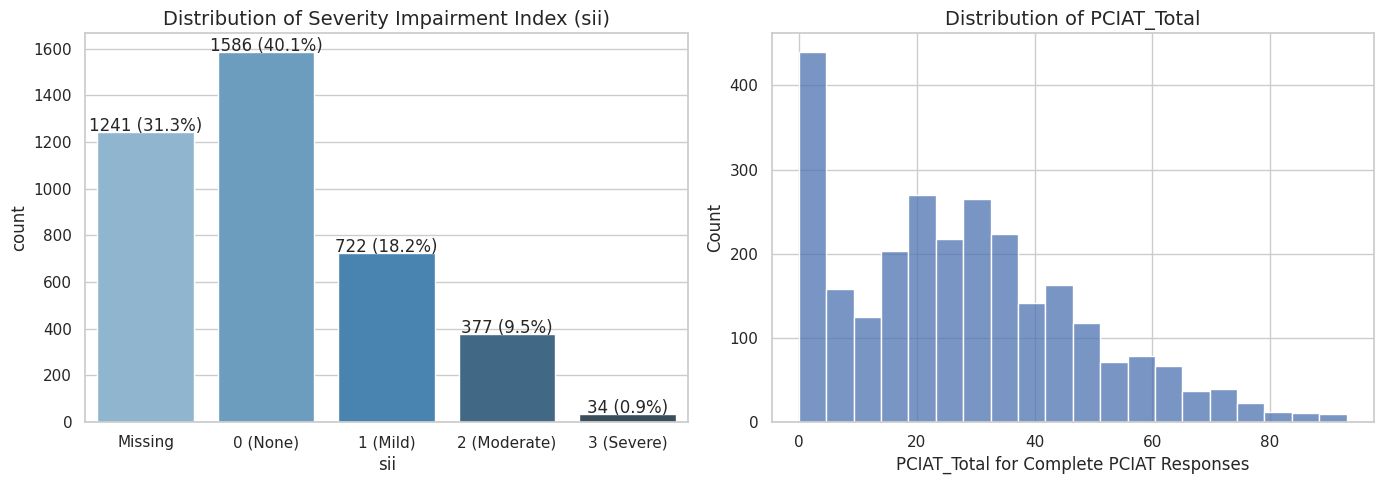

In [10]:
sii_counts = train['sii'].value_counts().reset_index()
total = sii_counts['count'].sum()
sii_counts['percentage'] = (sii_counts['count'] / total) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# SII
sns.barplot(x='sii', y='count', data=sii_counts, palette='Blues_d', ax=axes[0])
axes[0].set_title('Distribution of Severity Impairment Index (sii)', fontsize=14)
for p in axes[0].patches:
    height = p.get_height()
    percentage = sii_counts.loc[sii_counts['count'] == height, 'percentage'].values[0]
    axes[0].text(
        p.get_x() + p.get_width() / 2,
        height + 5, f'{int(height)} ({percentage:.1f}%)',
        ha="center", fontsize=12
    )

# PCIAT_Total for complete responses
sns.histplot(train['complete_resp_total'].dropna(), bins=20, ax=axes[1])
axes[1].set_title('Distribution of PCIAT_Total', fontsize=14)
axes[1].set_xlabel('PCIAT_Total for Complete PCIAT Responses')

plt.tight_layout()
plt.show()


In [11]:
len(train[train['complete_resp_total'] == 0])

307

In [12]:
assert train['Basic_Demos-Age'].isna().sum() == 0
assert train['Basic_Demos-Sex'].isna().sum() == 0

In [13]:
train['Age Group'] = pd.cut(
    train['Basic_Demos-Age'],
    bins=[4, 12, 18, 22],
    labels=['Children (5-12)', 'Adolescents (13-18)', 'Adults (19-22)']
)
calculate_stats(train, 'Age Group')

,count (%)
Age Group,
Children (5-12),2919 (73.71%)
Adolescents (13-18),953 (24.07%)
Adults (19-22),88 (2.22%)


In [14]:
sex_map = {0: 'Male', 1: 'Female'}
train['Basic_Demos-Sex'] = train['Basic_Demos-Sex'].map(sex_map)
calculate_stats(train, 'Basic_Demos-Sex')

,count (%)
Basic_Demos-Sex,
Male,2484 (62.73%)
Female,1476 (37.27%)


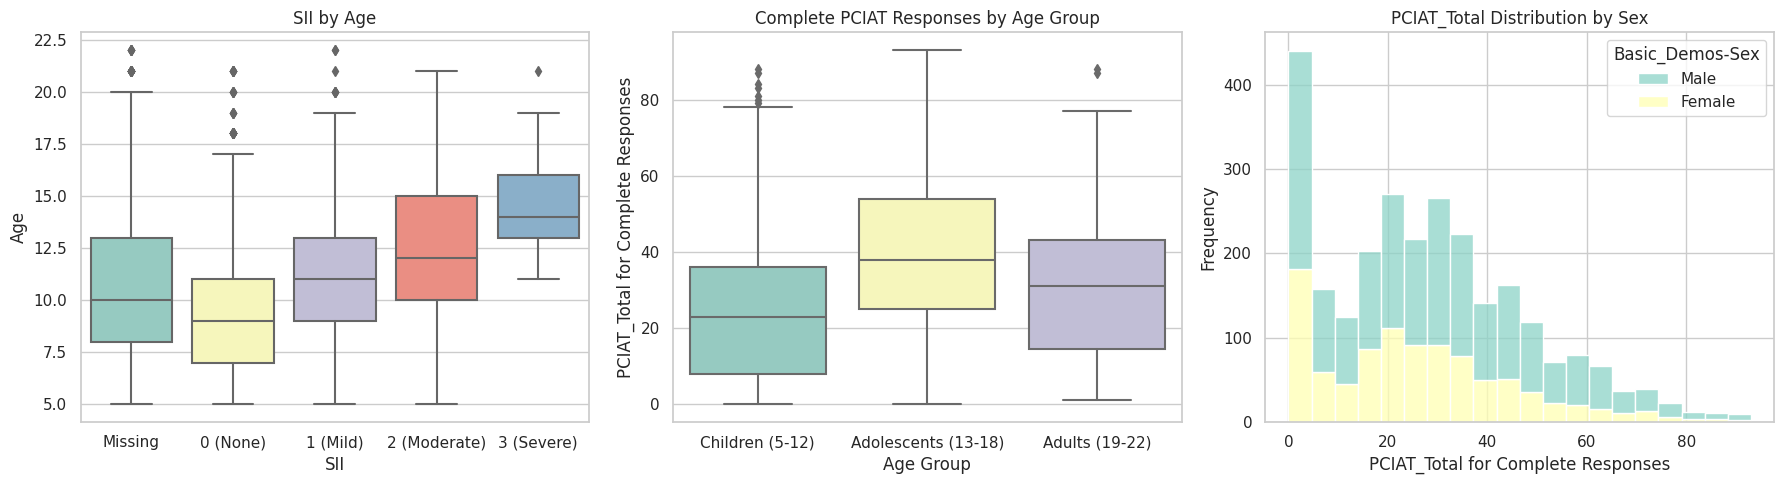

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# SII by Age
sns.boxplot(y=train['Basic_Demos-Age'], x=train['sii'], ax=axes[0], palette="Set3")
axes[0].set_title('SII by Age')
axes[0].set_ylabel('Age')
axes[0].set_xlabel('SII')

# Complete PCIAT Responses by Age Group
sns.boxplot(
    x='Age Group', y='complete_resp_total',
    data=train, palette="Set3", ax=axes[1]
)
axes[1].set_title('Complete PCIAT Responses by Age Group')
axes[1].set_ylabel('PCIAT_Total for Complete Responses')
axes[1].set_xlabel('Age Group')

# PCIAT_Total by Sex
sns.histplot(
    data=train, x='complete_resp_total',
    hue='Basic_Demos-Sex', multiple='stack',
    palette="Set3", bins=20, ax=axes[2]
)
axes[2].set_title('PCIAT_Total Distribution by Sex')
axes[2].set_xlabel('PCIAT_Total for Complete Responses')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


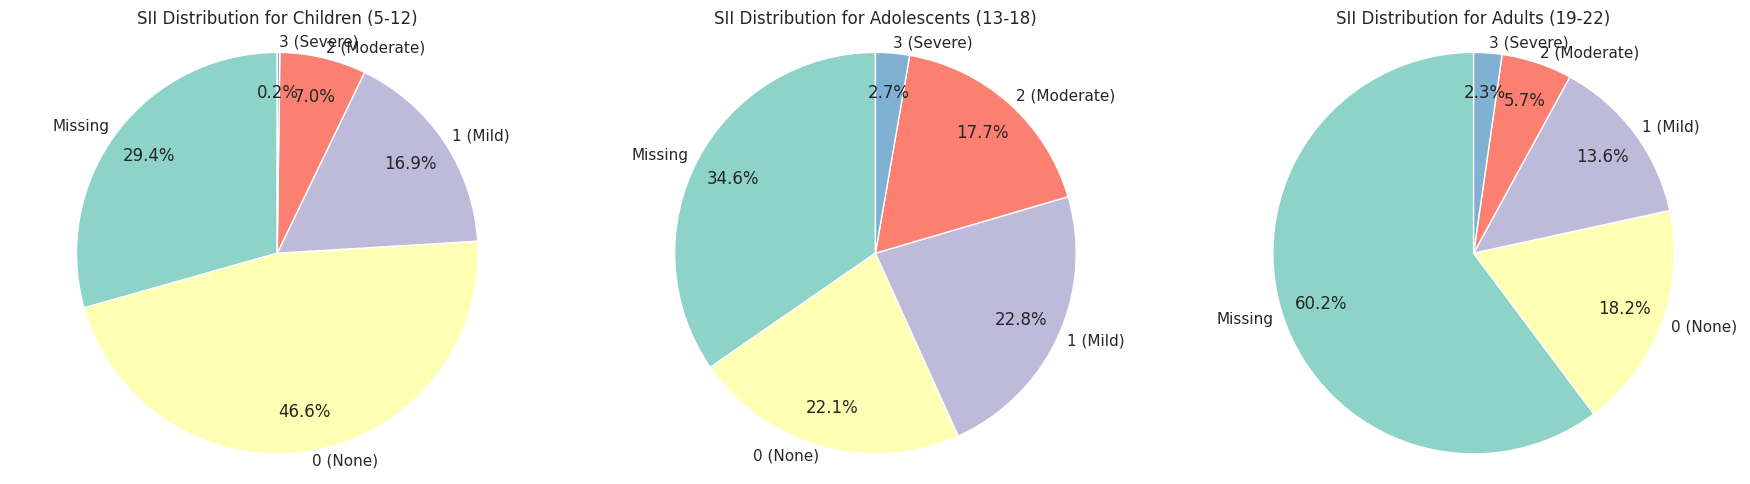

In [16]:
stats = train.groupby(['Age Group', 'sii']).size().unstack(fill_value=0)
fig, axes = plt.subplots(1, len(stats), figsize=(18, 5))

for i, age_group in enumerate(stats.index):
    group_counts = stats.loc[age_group] / stats.loc[age_group].sum()
    axes[i].pie(
        group_counts, labels=group_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("Set3"),
        labeldistance=1.05, pctdistance=0.80
    )
    axes[i].set_title(f'SII Distribution for {age_group}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

In [17]:
stats = train.groupby(['Age Group', 'sii']).size().unstack(fill_value=0)
stats_prop = stats.div(stats.sum(axis=1), axis=0) * 100

stats = stats.astype(str) +' (' + stats_prop.round(1).astype(str) + '%)'
stats

sii,Missing,0 (None),1 (Mild),2 (Moderate),3 (Severe)
Age Group,,,,,
Children (5-12),858 (29.4%),1359 (46.6%),493 (16.9%),203 (7.0%),6 (0.2%)
Adolescents (13-18),330 (34.6%),211 (22.1%),217 (22.8%),169 (17.7%),26 (2.7%)
Adults (19-22),53 (60.2%),16 (18.2%),12 (13.6%),5 (5.7%),2 (2.3%)


In [18]:
stats = train[train['sii'] != 'Missing'].groupby(
    ['Age Group', 'sii']
).size().unstack(fill_value=0)
stats_prop = stats.div(stats.sum(axis=1), axis=0) * 100

stats = stats.astype(str) +' (' + stats_prop.round(1).astype(str) + '%)'
stats

sii,Missing,0 (None),1 (Mild),2 (Moderate),3 (Severe)
Age Group,,,,,
Children (5-12),0 (0.0%),1359 (65.9%),493 (23.9%),203 (9.8%),6 (0.3%)
Adolescents (13-18),0 (0.0%),211 (33.9%),217 (34.8%),169 (27.1%),26 (4.2%)
Adults (19-22),0 (0.0%),16 (45.7%),12 (34.3%),5 (14.3%),2 (5.7%)


In [19]:
data = train[train['PreInt_EduHx-computerinternet_hoursday'].notna()]
age_range = data['Basic_Demos-Age']
print(
    f"Age range for participants with measured PreInt_EduHx-computerinternet_hoursday data:"
    f" {age_range.min()} - {age_range.max()} years"
)

Age range for participants with measured PreInt_EduHx-computerinternet_hoursday data: 5 - 22 years


In [20]:
train['PreInt_EduHx-computerinternet_hoursday'].unique()

array([ 3.,  0.,  2., nan,  1.])

In [21]:
param_map = {0: '< 1h/day', 1: '~ 1h/day', 2: '~ 2hs/day', 3: '> 3hs/day'}
train['internet_use_encoded'] = train[
    'PreInt_EduHx-computerinternet_hoursday'
].map(param_map).fillna('Missing')

param_ord = ['Missing', '< 1h/day', '~ 1h/day', '~ 2hs/day', '> 3hs/day']
train['internet_use_encoded'] = pd.Categorical(
    train['internet_use_encoded'], categories=param_ord,
    ordered=True
)

In [22]:
calculate_stats(train, 'PreInt_EduHx-Season')

,count (%)
PreInt_EduHx-Season,
Fall,828 (20.91%)
Summer,821 (20.73%)
Winter,906 (22.88%)
NaN,420 (10.61%)
Spring,985 (24.87%)


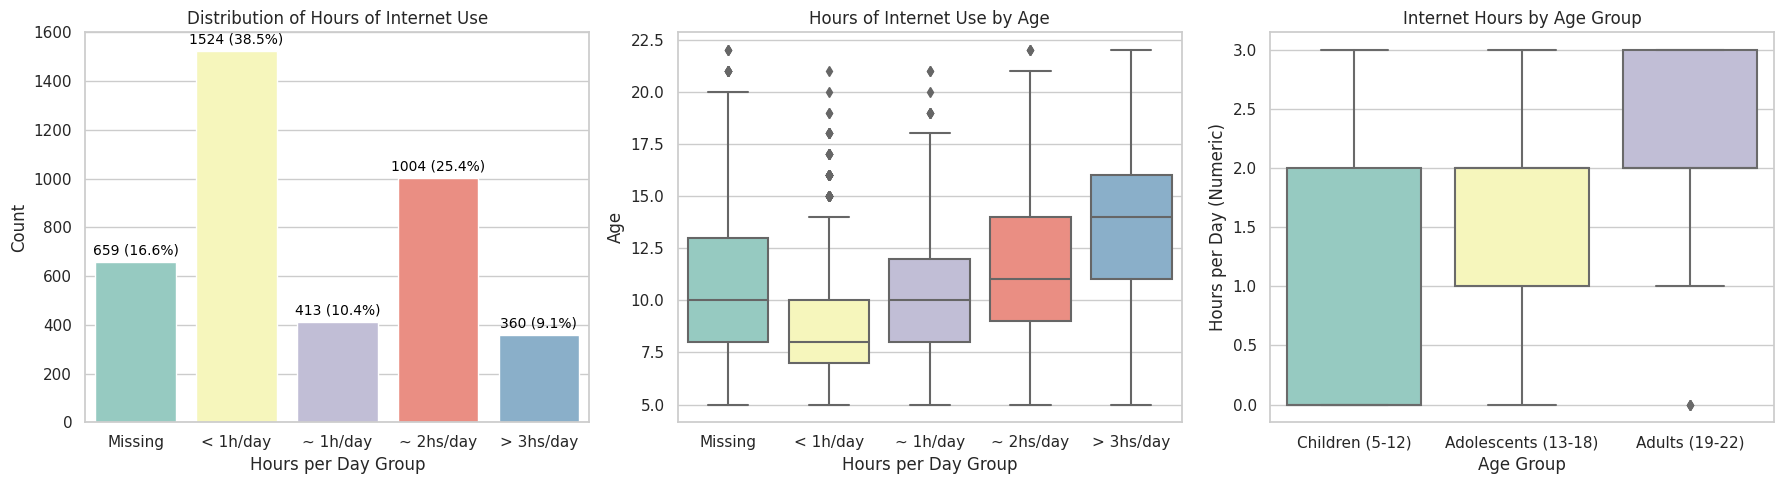

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Hours of Internet Use
ax1 = sns.countplot(x='internet_use_encoded', data=train, palette="Set3", ax=axes[0])
axes[0].set_title('Distribution of Hours of Internet Use')
axes[0].set_xlabel('Hours per Day Group')
axes[0].set_ylabel('Count')

total = len(train['internet_use_encoded'])
for p in ax1.patches:
    count = int(p.get_height())
    percentage = '{:.1f}%'.format(100 * count / total)
    ax1.annotate(f'{count} ({percentage})', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                 textcoords='offset points')

# Hours of Internet Use by Age
sns.boxplot(y=train['Basic_Demos-Age'], x=train['internet_use_encoded'], ax=axes[1], palette="Set3")
axes[1].set_title('Hours of Internet Use by Age')
axes[1].set_ylabel('Age')
axes[1].set_xlabel('Hours per Day Group')
# Hours of Internet Use (numeric) by Age Group
sns.boxplot(y='PreInt_EduHx-computerinternet_hoursday', x='Age Group', data=train, ax=axes[2], palette="Set3")
axes[2].set_title('Internet Hours by Age Group')
axes[2].set_ylabel('Hours per Day (Numeric)')
axes[2].set_xlabel('Age Group')

plt.tight_layout()
plt.show()

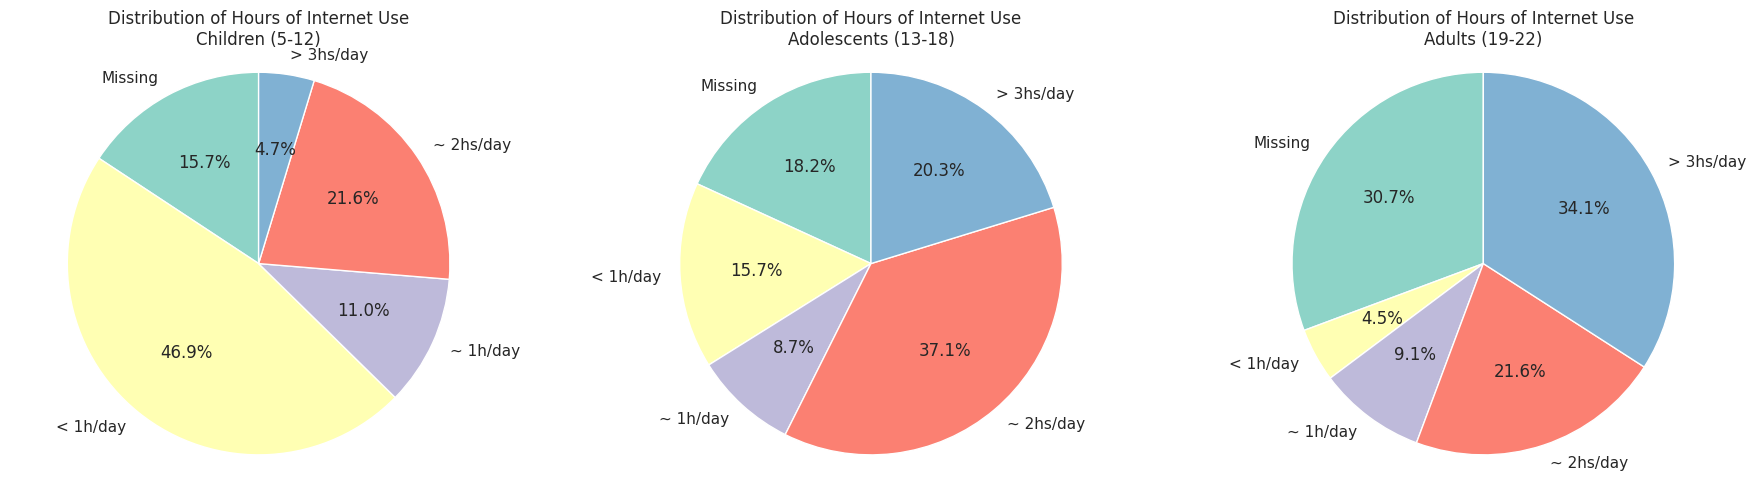

In [24]:
stats = train.groupby(
    ['Age Group', 'internet_use_encoded']
).size().unstack(fill_value=0)
fig, axes = plt.subplots(1, len(stats), figsize=(18, 5))

for i, age_group in enumerate(stats.index):
    group_counts = stats.loc[age_group] / stats.loc[age_group].sum()
    axes[i].pie(group_counts, labels=group_counts.index, autopct='%1.1f%%',
                startangle=90, colors=sns.color_palette("Set3"), labeldistance=1.1)
    axes[i].set_title(f'Distribution of Hours of Internet Use\n{age_group}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

In [25]:
train_non_na = train.dropna(subset=['PreInt_EduHx-computerinternet_hoursday'])
rows = (train_non_na['PreInt_EduHx-computerinternet_hoursday'] == 3).sum()
print(f"Non-NA Rows - Internet use 3h or more: {(rows / len(train_non_na)) * 100:.2f}%")

rows = (train_non_na['PreInt_EduHx-computerinternet_hoursday'] == 0).sum()
print(f"Non-NA Rows - Internet use 1h or less: {(rows / len(train_non_na)) * 100:.2f}%")

Non-NA Rows - Internet use 3h or more: 10.91%
Non-NA Rows - Internet use 1h or less: 46.17%


In [26]:
stats = train.groupby(['Basic_Demos-Sex', 'internet_use_encoded']
).size().unstack(fill_value=0)
stats_prop = stats.div(stats.sum(axis=1), axis=0) * 100

stats = stats.astype(str) +' (' + stats_prop.round(1).astype(str) + '%)'
stats

internet_use_encoded,Missing,< 1h/day,~ 1h/day,~ 2hs/day,> 3hs/day
Basic_Demos-Sex,,,,,
Female,271 (18.4%),569 (38.6%),139 (9.4%),353 (23.9%),144 (9.8%)
Male,388 (15.6%),955 (38.4%),274 (11.0%),651 (26.2%),216 (8.7%)


In [27]:
sii_reported = train[train['sii'] != "Missing"]
sii_reported.loc[:, 'sii'] = sii_reported['sii'].cat.remove_unused_categories()

In [28]:
stats = sii_reported.groupby(
    ['internet_use_encoded', 'sii']
).size().unstack(fill_value=0)
stats_prop = stats.div(stats.sum(axis=1), axis=0) * 100

stats = stats.astype(str) +' (' + stats_prop.round(1).astype(str) + '%)'
stats

sii,0 (None),1 (Mild),2 (Moderate),3 (Severe)
internet_use_encoded,,,,
Missing,52 (63.4%),15 (18.3%),15 (18.3%),0 (0.0%)
< 1h/day,933 (73.9%),247 (19.6%),78 (6.2%),5 (0.4%)
~ 1h/day,160 (47.2%),123 (36.3%),54 (15.9%),2 (0.6%)
~ 2hs/day,366 (47.2%),251 (32.3%),147 (18.9%),12 (1.5%)
> 3hs/day,75 (29.0%),86 (33.2%),83 (32.0%),15 (5.8%)


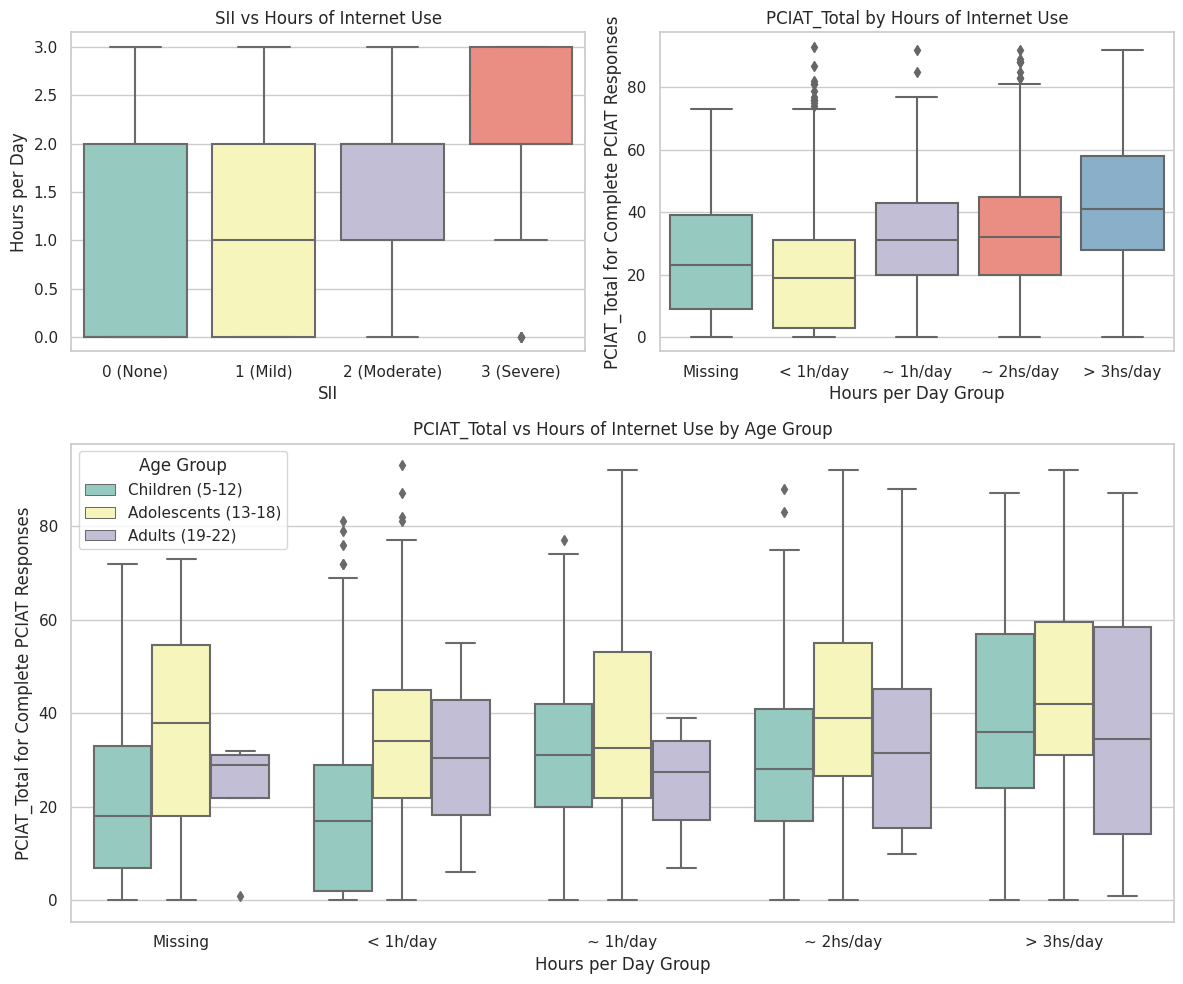

In [29]:
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.5])

# SII vs Hours of Internet Use
ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(
    x='sii', y='PreInt_EduHx-computerinternet_hoursday',
    data=sii_reported,
    ax=ax1, palette="Set3"
)
ax1.set_title('SII vs Hours of Internet Use')
ax1.set_ylabel('Hours per Day')
ax1.set_xlabel('SII')

# PCIAT_Total for Complete PCIAT Responses by Hours of Internet Use
ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(
    x='internet_use_encoded', y='complete_resp_total',
    data=sii_reported,
    palette="Set3", ax=ax2
)
ax2.set_title('PCIAT_Total by Hours of Internet Use')
ax2.set_ylabel('PCIAT_Total for Complete PCIAT Responses')
ax2.set_xlabel('Hours per Day Group')
# SII vs Hours of Internet Use by Age Group (Full width)
ax3 = fig.add_subplot(gs[1, :])
sns.boxplot(
    x='internet_use_encoded', y='complete_resp_total',
    data=sii_reported,
    hue='Age Group', ax=ax3, palette="Set3"
)
ax3.set_title('PCIAT_Total vs Hours of Internet Use by Age Group')
ax3.set_ylabel('PCIAT_Total for Complete PCIAT Responses')
ax3.set_xlabel('Hours per Day Group')

plt.tight_layout()
plt.show()

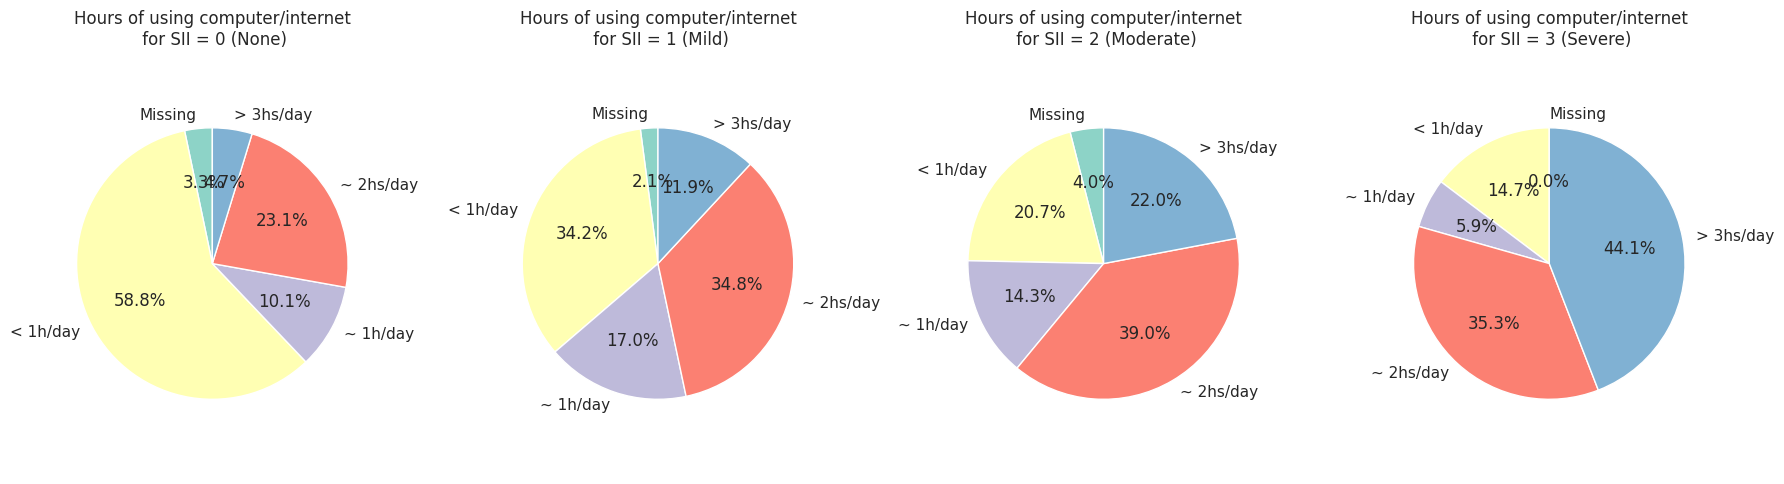

In [30]:
stats = sii_reported.groupby(
    ['sii', 'internet_use_encoded']
).size().unstack(fill_value=0)
fig, axes = plt.subplots(1, len(stats), figsize=(18, 5))

for i, sii_group in enumerate(stats.index):
    group_counts = stats.loc[sii_group] / stats.loc[sii_group].sum()
    axes[i].pie(
        group_counts, labels=group_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("Set3"), labeldistance=1.1
    )
    axes[i].set_title(f'Hours of using computer/internet\n for SII = {sii_group}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()


In [31]:
stats = sii_reported.groupby(
    ['sii', 'internet_use_encoded']
).size().unstack(fill_value=0)
stats_prop = stats.div(stats.sum(axis=1), axis=0) * 100

stats = stats.astype(str) +' (' + stats_prop.round(1).astype(str) + '%)'
stats

internet_use_encoded,Missing,< 1h/day,~ 1h/day,~ 2hs/day,> 3hs/day
sii,,,,,
0 (None),52 (3.3%),933 (58.8%),160 (10.1%),366 (23.1%),75 (4.7%)
1 (Mild),15 (2.1%),247 (34.2%),123 (17.0%),251 (34.8%),86 (11.9%)
2 (Moderate),15 (4.0%),78 (20.7%),54 (14.3%),147 (39.0%),83 (22.0%)
3 (Severe),0 (0.0%),5 (14.7%),2 (5.9%),12 (35.3%),15 (44.1%)


In [32]:
train[
    (train['internet_use_encoded'] == '< 1h/day') & 
    (train['sii'].isin(['2 (Moderate)', '3 (Severe)']))
]['Basic_Demos-Age'].describe()

count    83.000000
mean     10.626506
std       3.083041
min       5.000000
25%       8.500000
50%      10.000000
75%      12.500000
max      21.000000
Name: Basic_Demos-Age, dtype: float64

In [33]:
groups = data_dict.groupby('Instrument')['Field'].apply(list).to_dict()

for instrument, features in groups.items():
    print(f"{instrument}: {features}\n")

Bio-electric Impedance Analysis: ['BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW']

Children's Global Assessment Scale: ['CGAS-Season', 'CGAS-CGAS_Score']

Demographics: ['Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex']

FitnessGram Child: ['FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone']

FitnessGram Vitals and Treadmill: ['Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec']

Identifier: ['id']

Internet Use: ['PreInt_EduHx-Season', 'PreInt_EduHx-computerinternet_hoursday']

P

In [34]:
season_columns = [col for col in train.columns if 'Season' in col]
season_df = train[season_columns]
season_df

,Basic_Demos-Enroll_Season,CGAS-Season,Physical-Season,Fitness_Endurance-Season,FGC-Season,BIA-Season,PAQ_A-Season,PAQ_C-Season,PCIAT-Season,SDS-Season,PreInt_EduHx-Season
0,Fall,Winter,Fall,NaN,Fall,Fall,NaN,NaN,Fall,NaN,Fall
1,Summer,NaN,Fall,NaN,Fall,Winter,NaN,Fall,Fall,Fall,Summer
2,Summer,Fall,Fall,Fall,Fall,NaN,NaN,Summer,Fall,Fall,Summer
3,Winter,Fall,Summer,Summer,Summer,Summer,NaN,Winter,Summer,Summer,Winter
4,Spring,Summer,NaN,NaN,NaN,NaN,Summer,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3955,Fall,Spring,Fall,NaN,Fall,Fall,NaN,Winter,Winter,Winter,Fall
3956,Winter,NaN,Spring,NaN,Spring,Spring,NaN,Winter,NaN,NaN,Winter
3957,Fall,Spring,Winter,NaN,Winter,Winter,NaN,Winter,Winter,Winter,Fall
3958,Spring,Spring,Winter,NaN,Spring,Summer,NaN,Spring,Spring,Spring,Spring


In [35]:
train[season_columns] = train[season_columns].fillna("Missing")

In [36]:
data_dict = data_dict[data_dict['Instrument'] != 'Parent-Child Internet Addiction Test']
continuous_cols = data_dict[data_dict['Type'].str.contains(
    'float|int', case=False
)]['Field'].tolist()

# target = train[['sii']]
# train = train.drop(columns = columns_not_in_test)

In [37]:
groups.get('Demographics', [])

['Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex']

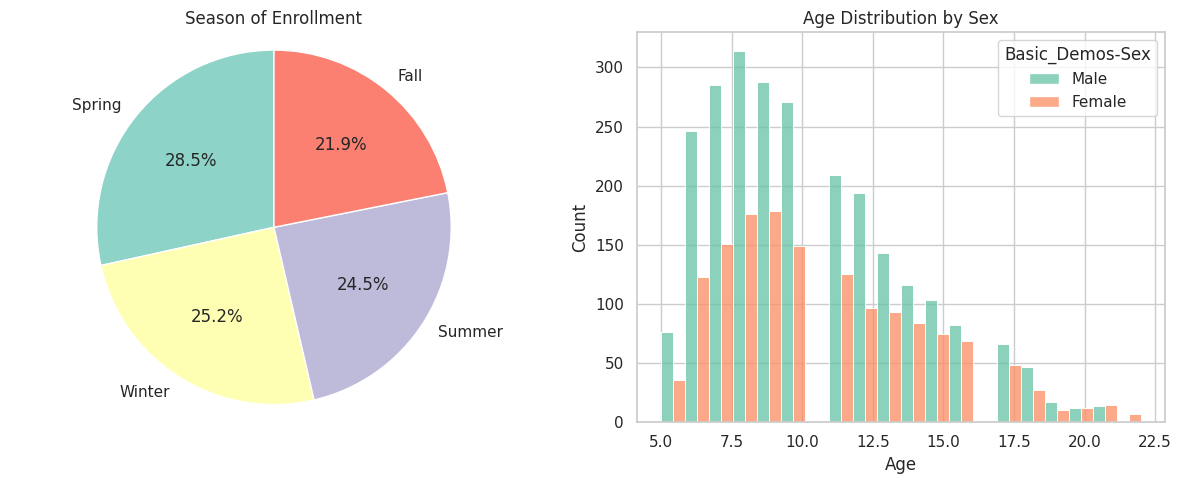

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Season of Enrollment
season_counts = train['Basic_Demos-Enroll_Season'].value_counts(dropna=False)

axes[0].pie(
    season_counts, labels=season_counts.index,
    autopct='%1.1f%%', startangle=90,
    colors=sns.color_palette("Set3")
)
axes[0].set_title('Season of Enrollment')
axes[0].axis('equal')

# Age Distribution by Sex
sns.histplot(
    data=train, x='Basic_Demos-Age',
    hue='Basic_Demos-Sex', multiple='dodge',
    palette="Set2", bins=20, ax=axes[1]
)
axes[1].set_title('Age Distribution by Sex')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [39]:
calculate_stats(train, 'Basic_Demos-Age')

,count,mean,std,min,25%,50%,75%,max,missing
Basic_Demos-Age,,,,,,,,,
Basic_Demos-Age,3960.0,10.433586,3.574648,5.0,8.0,10.0,13.0,22.0,0


In [40]:
groups.get("Children's Global Assessment Scale", [])

['CGAS-Season', 'CGAS-CGAS_Score']

In [41]:
data = train[train['CGAS-CGAS_Score'].notnull()]
age_range = data['Basic_Demos-Age']
print(
    f"Age range for participants with CGAS-CGAS_Score data:"
    f" {age_range.min()} - {age_range.max()} years"
)

Age range for participants with CGAS-CGAS_Score data: 5 - 22 years


In [42]:
calculate_stats(train, 'CGAS-CGAS_Score')

,count,mean,std,min,25%,50%,75%,max,missing
CGAS-CGAS_Score,,,,,,,,,
CGAS-CGAS_Score,2421.0,65.454771,22.341862,25.0,59.0,65.0,75.0,999.0,1539


In [43]:
train[train['CGAS-CGAS_Score'] > 100]

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,complete_resp_total,Age Group,internet_use_encoded
2065,83525bbe,Fall,11,Female,Winter,999.0,Fall,NaN,NaN,NaN,...,NaN,Missing,NaN,NaN,Fall,3.0,Missing,NaN,Children (5-12),> 3hs/day


In [44]:
train.loc[train['CGAS-CGAS_Score'] == 999, 'CGAS-CGAS_Score'] = np.nan

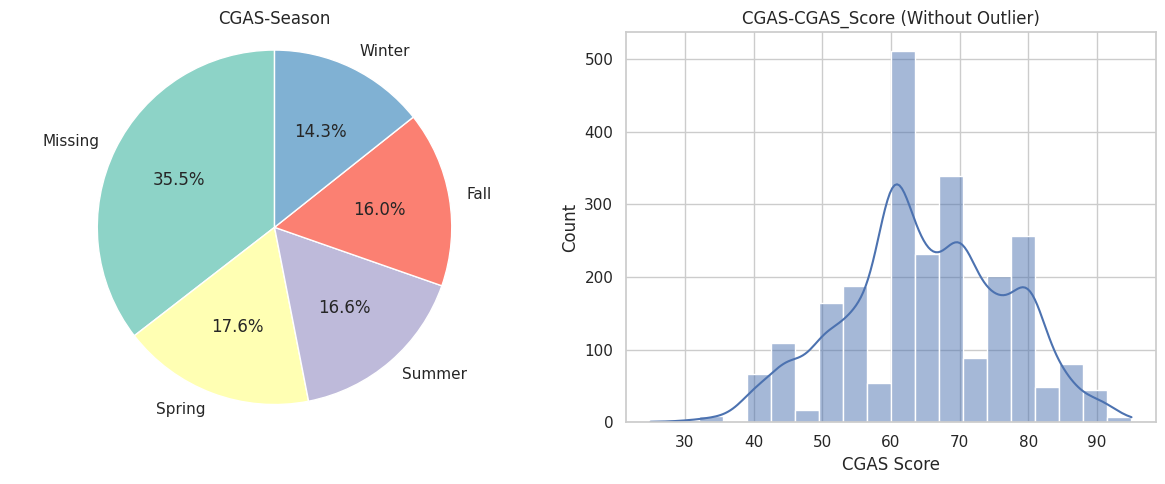

In [45]:
plt.figure(figsize=(12, 5))

# CGAS-Season
plt.subplot(1, 2, 1)
cgas_season_counts = train['CGAS-Season'].value_counts(normalize=True)
plt.pie(
    cgas_season_counts, 
    labels=cgas_season_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("Set3")
)
plt.title('CGAS-Season')
plt.axis('equal')

# CGAS-CGAS_Score without outliers (score == 999)
plt.subplot(1, 2, 2)
sns.histplot(
    train['CGAS-CGAS_Score'].dropna(),
    bins=20, kde=True
)
plt.title('CGAS-CGAS_Score (Without Outlier)')
plt.xlabel('CGAS Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [46]:
calculate_stats(train, 'CGAS-CGAS_Score')

,count,mean,std,min,25%,50%,75%,max,missing
CGAS-CGAS_Score,,,,,,,,,
CGAS-CGAS_Score,2420.0,65.069008,11.78731,25.0,59.0,65.0,75.0,95.0,1540


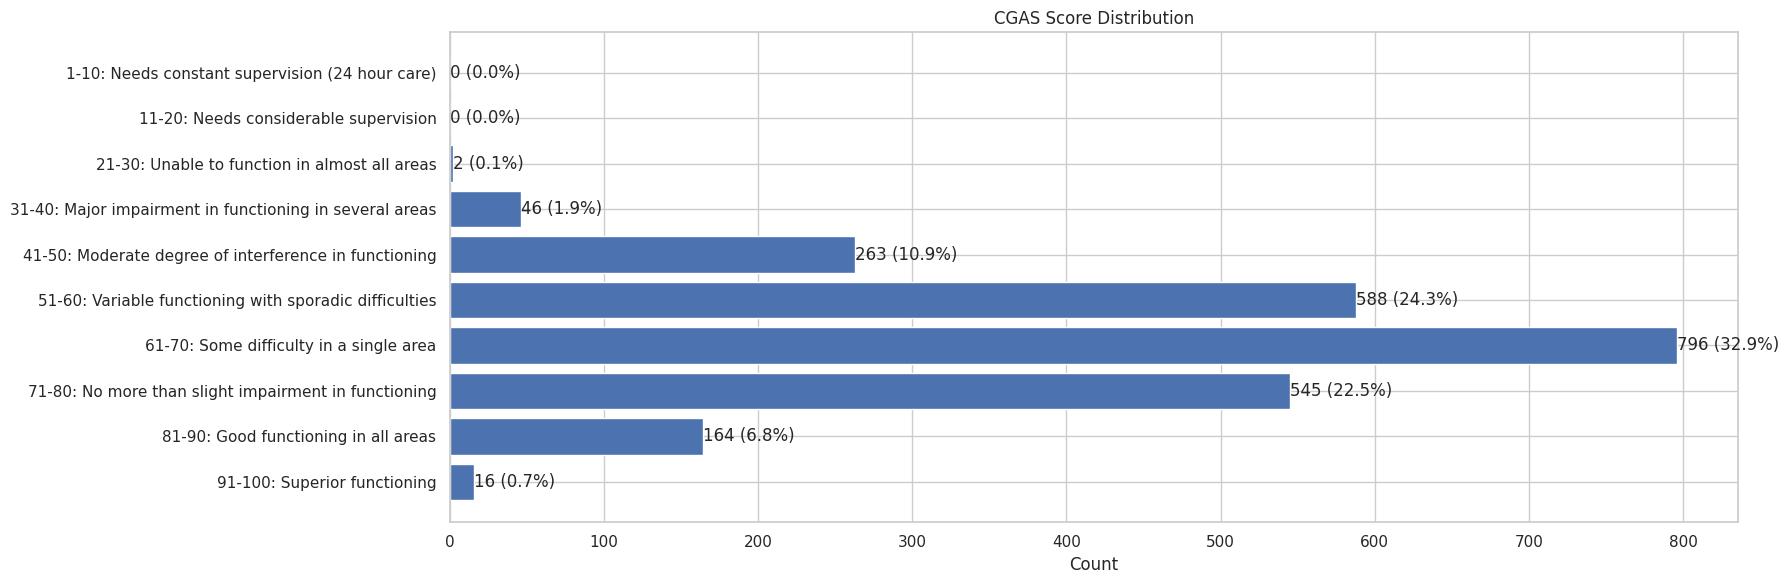

In [47]:
bins = np.arange(0, 101, 10)
labels = [
    "1-10: Needs constant supervision (24 hour care)",
    "11-20: Needs considerable supervision",
    "21-30: Unable to function in almost all areas",
    "31-40: Major impairment in functioning in several areas",
    "41-50: Moderate degree of interference in functioning",
    "51-60: Variable functioning with sporadic difficulties",
    "61-70: Some difficulty in a single area",
    "71-80: No more than slight impairment in functioning",
    "81-90: Good functioning in all areas",
    "91-100: Superior functioning"
]

train['CGAS_Score_Bin'] = pd.cut(
    train['CGAS-CGAS_Score'], bins=bins, labels=labels
)

counts = train['CGAS_Score_Bin'].value_counts().reindex(labels)
prop = (counts / counts.sum() * 100).round(1)
count_prop_labels = counts.astype(str) + " (" + prop.astype(str) + "%)"

plt.figure(figsize=(18, 6))
bars = plt.barh(labels, counts)
plt.xlabel('Count')
plt.title('CGAS Score Distribution')
for bar, label in zip(bars, count_prop_labels):
    plt.text(
        bar.get_width(), bar.get_y() + bar.get_height() / 2, label, va='center'
    )

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [48]:
train_filt = train.dropna(subset=['CGAS_Score_Bin', 'complete_resp_total'])
train_filt.loc[:, 'CGAS_Score_Bin'] = train_filt['CGAS_Score_Bin'].cat.remove_unused_categories()
train_filt.loc[:, 'sii'] = train_filt['sii'].cat.remove_unused_categories()
len(train_filt)

2288

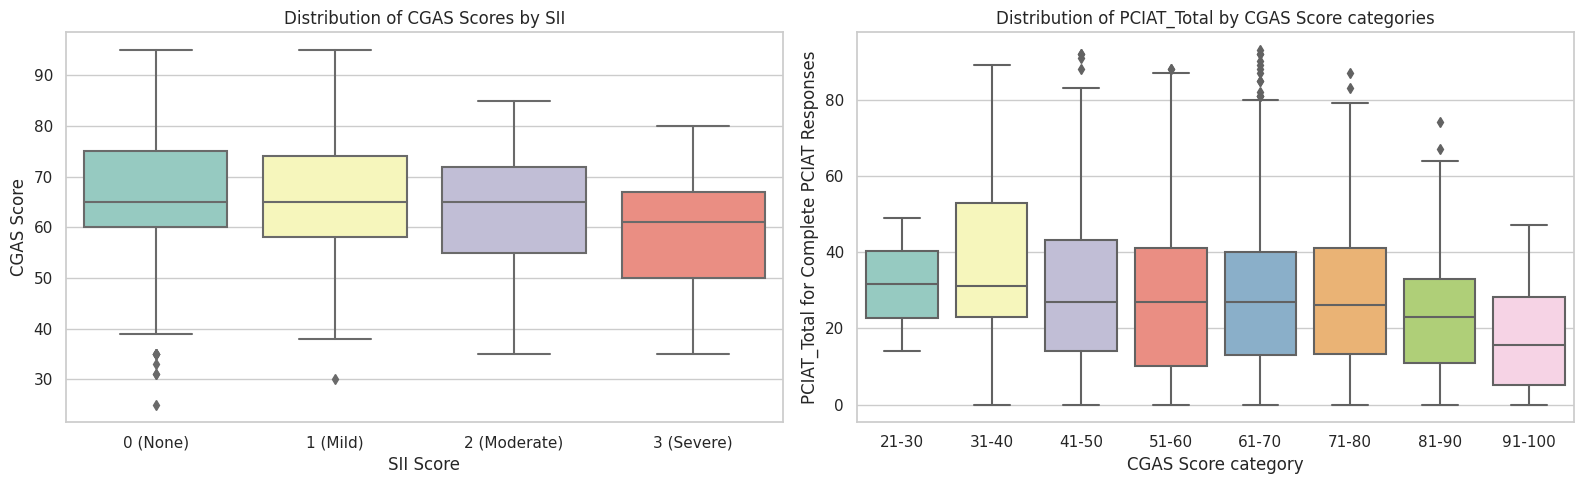

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# CGAS-CGAS_Score vs sii
sns.boxplot(
    data=train_filt,
    x='sii', y='CGAS-CGAS_Score',
    palette='Set3', ax=axes[0]
)
axes[0].set_xlabel('SII Score')
axes[0].set_ylabel('CGAS Score')
axes[0].set_title('Distribution of CGAS Scores by SII')

# complete_resp_total vs CGAS_Score_Bin
sns.boxplot(
    data=train_filt,
    x='CGAS_Score_Bin', y='complete_resp_total',
    ax=axes[1], palette='Set3'
)
# Get the tick positions and match the labels
range_labels = [label.split(":")[0] for label in train_filt['CGAS_Score_Bin'].cat.categories]
axes[1].set_xticklabels(range_labels)

axes[1].set_xlabel('CGAS Score category')
axes[1].set_ylabel('PCIAT_Total for Complete PCIAT Responses')
axes[1].set_title('Distribution of PCIAT_Total by CGAS Score categories')

plt.tight_layout()
plt.show()

In [50]:
score_min_max = train.groupby('sii')['CGAS-CGAS_Score'].agg(['min', 'max'])
score_min_max = score_min_max.rename(
    columns={'min': 'Minimum CGAS Score', 'max': 'Maximum CGAS Score'}
)
score_min_max

,Minimum CGAS Score,Maximum CGAS Score
sii,,
Missing,40.0,85.0
0 (None),25.0,95.0
1 (Mild),30.0,95.0
2 (Moderate),35.0,85.0
3 (Severe),35.0,80.0


In [51]:
train_filt[train_filt['CGAS-CGAS_Score'] < 35][
    ['Basic_Demos-Age', 'Basic_Demos-Sex', 'sii',
     'CGAS-CGAS_Score',
     'PreInt_EduHx-computerinternet_hoursday']
]

,Basic_Demos-Age,Basic_Demos-Sex,sii,CGAS-CGAS_Score,PreInt_EduHx-computerinternet_hoursday
2417,9,Female,0 (None),31.0,0.0
2525,13,Female,1 (Mild),30.0,0.0
2555,15,Male,0 (None),33.0,2.0
3332,12,Male,0 (None),25.0,2.0
3858,15,Male,0 (None),31.0,3.0


In [52]:
train[train['CGAS-CGAS_Score'] > 90][
    ['Basic_Demos-Age', 'Basic_Demos-Sex', 'sii',
     'CGAS-CGAS_Score',
     'PreInt_EduHx-computerinternet_hoursday']
]

,Basic_Demos-Age,Basic_Demos-Sex,sii,CGAS-CGAS_Score,PreInt_EduHx-computerinternet_hoursday
310,13,Female,0 (None),91.0,2.0
591,10,Female,0 (None),93.0,NaN
667,13,Male,0 (None),95.0,0.0
910,10,Female,0 (None),91.0,0.0
1007,14,Male,1 (Mild),95.0,0.0
1157,14,Female,1 (Mild),91.0,2.0
1640,11,Female,0 (None),92.0,0.0
2342,6,Female,0 (None),91.0,0.0
2668,14,Female,0 (None),92.0,0.0
2675,11,Male,0 (None),91.0,0.0


In [53]:
groups.get('Physical Measures', [])

['Physical-Season',
 'Physical-BMI',
 'Physical-Height',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'Physical-Diastolic_BP',
 'Physical-HeartRate',
 'Physical-Systolic_BP']

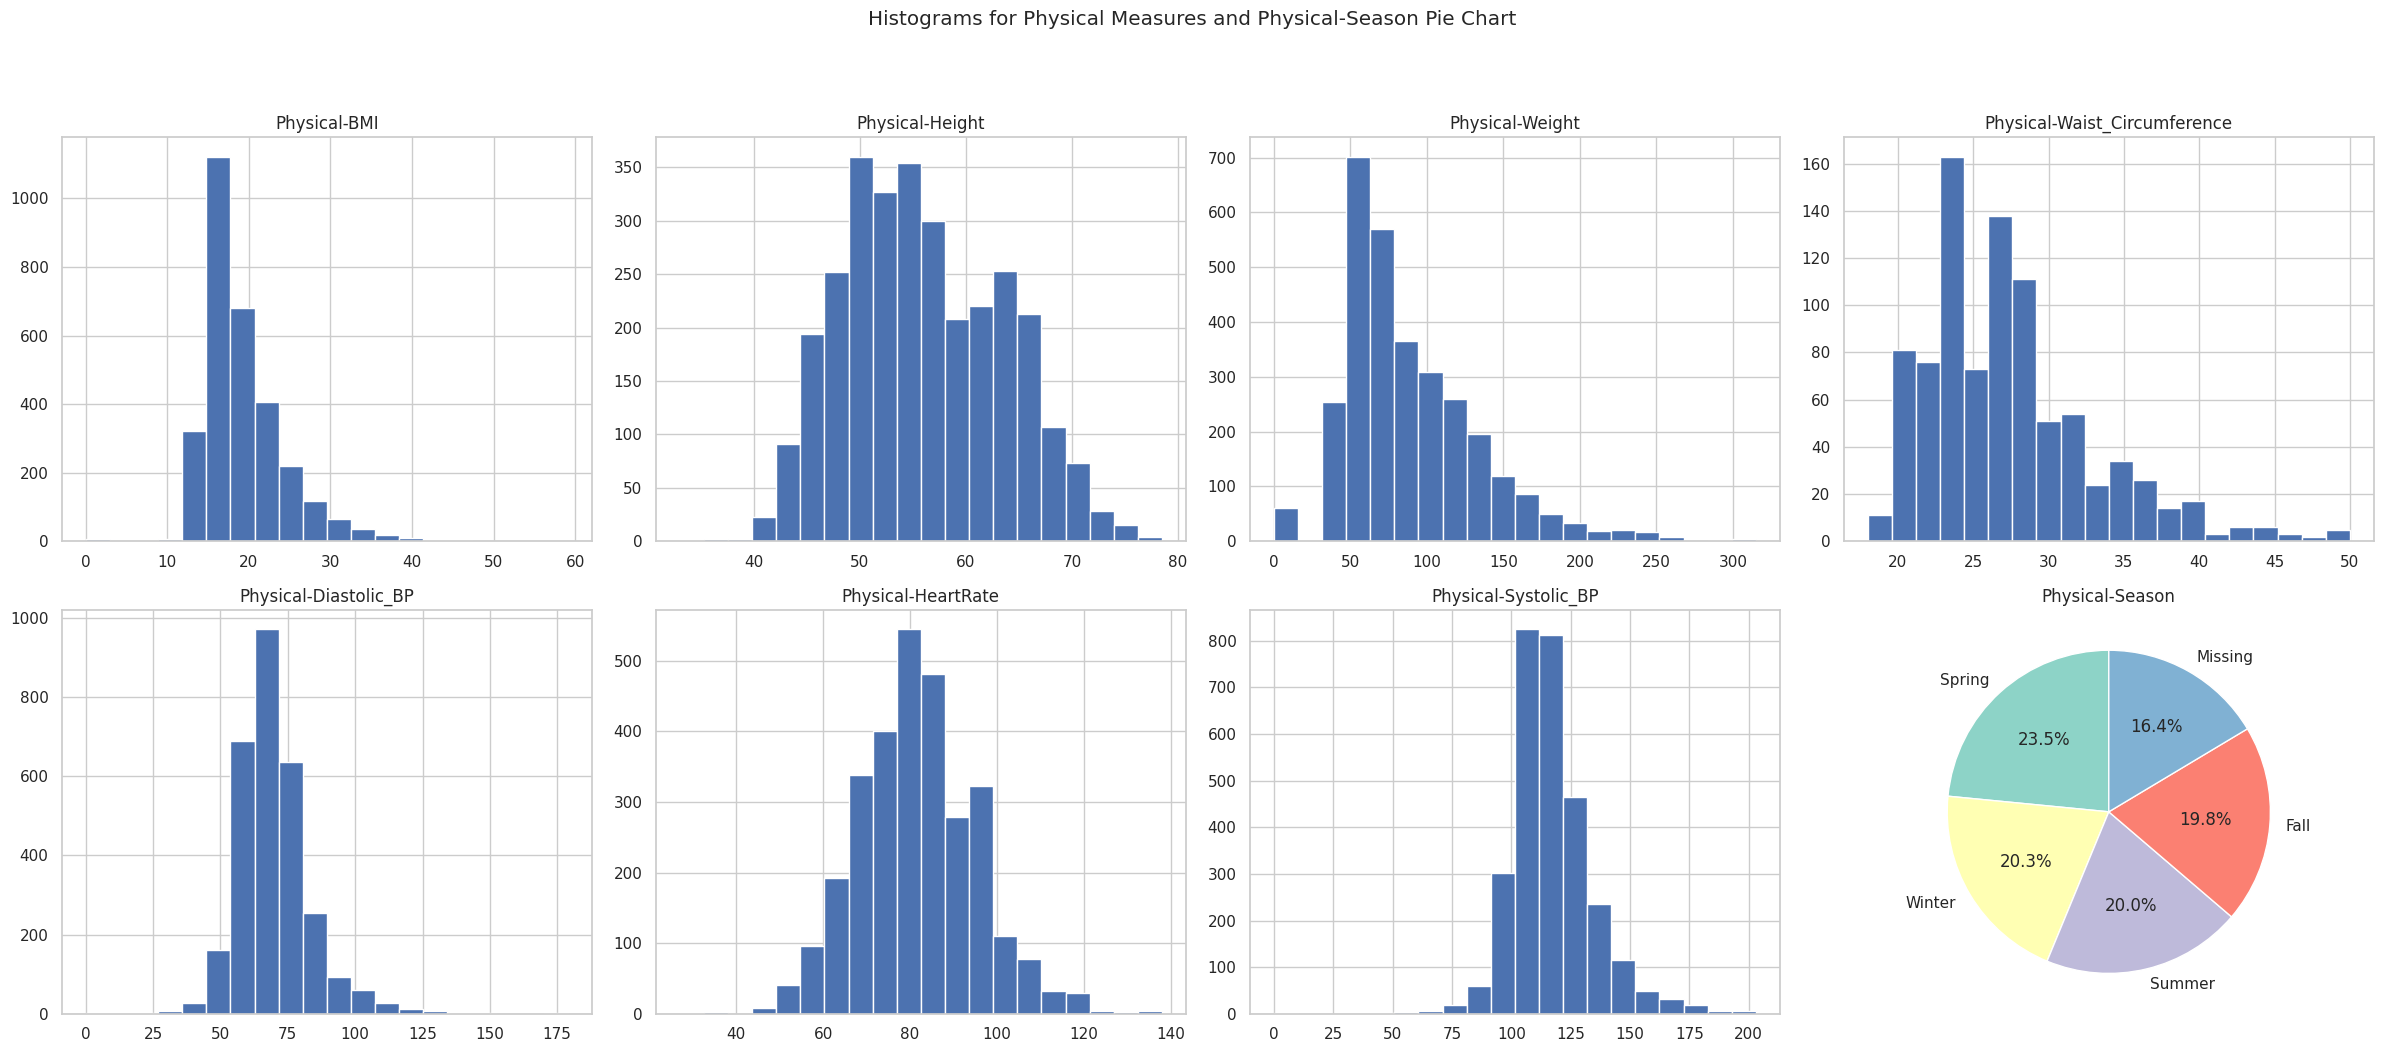

In [54]:
features_physical = groups.get('Physical Measures', [])
cols = [col for col in features_physical if col in continuous_cols]

plt.figure(figsize=(24, 10))
n_cols = 4
n_rows = len(cols) // n_cols + 1

for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i + 1)
    train[col].hist(bins=20)
    plt.title(col)

plt.subplot(n_rows, n_cols, len(cols) + 1)
season_counts = train['Physical-Season'].value_counts(dropna=False)
plt.pie(
    season_counts,
    labels=season_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set3")
)
plt.title('Physical-Season')

plt.suptitle('Histograms for Physical Measures and Physical-Season Pie Chart', y=1.05)
plt.tight_layout()
plt.show()

In [55]:
calculate_stats(train, cols)

,count,mean,std,min,25%,50%,75%,max,missing
Physical-BMI,3022.0,19.331929,5.113934,0.0,15.86935,17.937682,21.571244,59.132048,938
Physical-Height,3027.0,55.946713,7.473764,33.0,50.00000,55.000000,62.000000,78.500000,933
Physical-Weight,3076.0,89.038615,44.569040,0.0,57.20000,77.000000,113.800000,315.000000,884
Physical-Waist_Circumference,898.0,27.278508,5.567287,18.0,23.00000,26.000000,30.000000,50.000000,3062
Physical-Diastolic_BP,2954.0,69.648951,13.611226,0.0,61.00000,68.000000,76.000000,179.000000,1006
Physical-HeartRate,2967.0,81.597236,13.665196,27.0,72.00000,81.000000,90.500000,138.000000,993
Physical-Systolic_BP,2954.0,116.983074,17.061225,0.0,107.00000,114.000000,125.000000,203.000000,1006


In [56]:
wh_cols = [
    'Physical-BMI', 'Physical-Height',
    'Physical-Weight', 'Physical-Waist_Circumference'
]

In [57]:
(train[wh_cols] == 0).sum()

Physical-BMI                     7
Physical-Height                  0
Physical-Weight                 61
Physical-Waist_Circumference     0
dtype: int64

In [58]:
train[wh_cols] = train[wh_cols].replace(0, np.nan)
calculate_stats(train, wh_cols)

,count,mean,std,min,25%,50%,75%,max,missing
Physical-BMI,3015.0,19.376812,5.034191,8.522436,15.890526,17.950925,21.588631,59.132048,945
Physical-Height,3027.0,55.946713,7.473764,33.000000,50.000000,55.000000,62.000000,78.500000,933
Physical-Weight,3015.0,90.840060,43.161374,31.800000,58.200000,77.800000,114.300000,315.000000,945
Physical-Waist_Circumference,898.0,27.278508,5.567287,18.000000,23.000000,26.000000,30.000000,50.000000,3062


In [59]:
lbs_to_kg = 0.453592
inches_to_cm = 2.54

train['Physical-Weight'] = train['Physical-Weight'] * lbs_to_kg
train['Physical-Height'] = train['Physical-Height'] * inches_to_cm
train['Physical-Waist_Circumference'] = train['Physical-Waist_Circumference'] * inches_to_cm

# Recalculate BMI: BMI = weight (kg) / (height (m)^2)
train['Physical-BMI'] = np.where(
    train['Physical-Weight'].notna() & train['Physical-Height'].notna(),
    train['Physical-Weight'] / ((train['Physical-Height'] / 100) ** 2),
    np.nan  # If either is NaN, set BMI to NaN
)

calculate_stats(train, wh_cols)

,count,mean,std,min,25%,50%,75%,max,missing
Physical-BMI,3015.0,19.378674,5.034658,8.523273,15.892086,17.952687,21.590750,59.137852,945
Physical-Height,3027.0,142.104651,18.983360,83.820000,127.000000,139.700000,157.480000,199.390000,933
Physical-Weight,3015.0,41.204324,19.577654,14.424226,26.399054,35.289458,51.845566,142.881480,945
Physical-Waist_Circumference,898.0,69.287410,14.140909,45.720000,58.420000,66.040000,76.200000,127.000000,3062


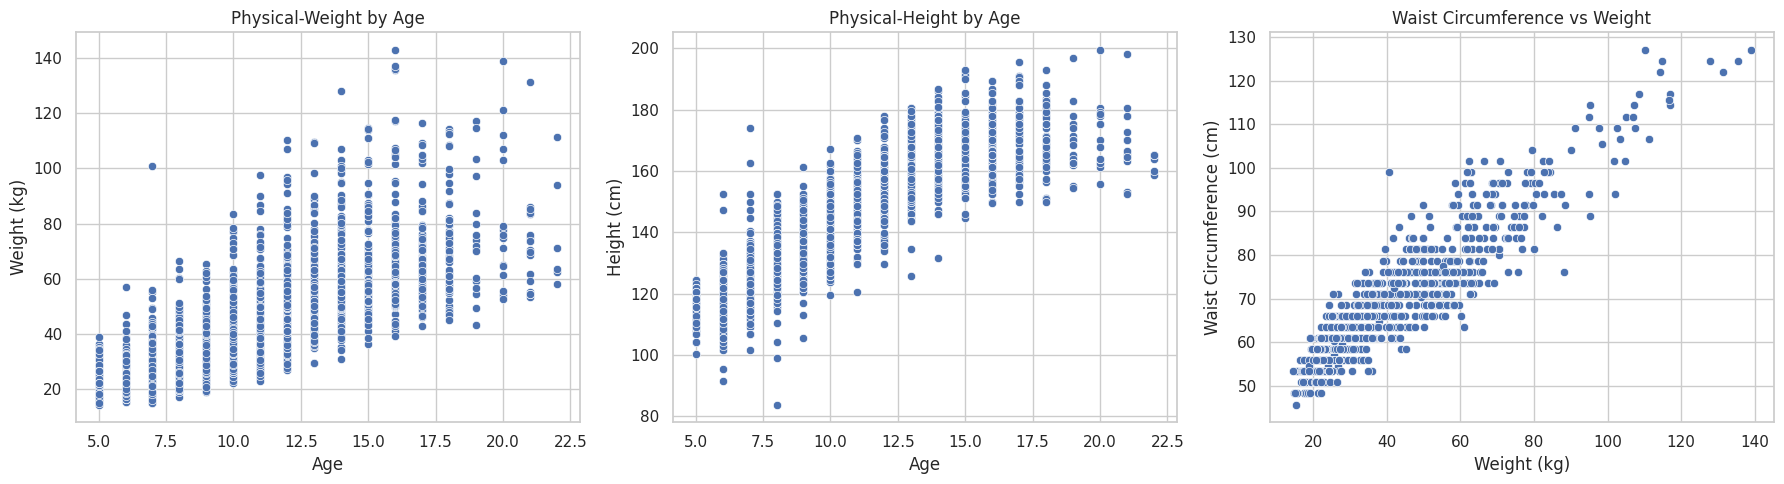

In [60]:
plt.figure(figsize=(18, 5))

# Physical-Weight by Age
plt.subplot(1, 3, 1)
sns.scatterplot(x='Basic_Demos-Age', y='Physical-Weight', data=train)
plt.title('Physical-Weight by Age')
plt.xlabel('Age')
plt.ylabel('Weight (kg)')

# Physical-Height by Age
plt.subplot(1, 3, 2)
sns.scatterplot(x='Basic_Demos-Age', y='Physical-Height', data=train)
plt.title('Physical-Height by Age')
plt.xlabel('Age')
plt.ylabel('Height (cm)')

# Physical-Waist_Circumference vs Physical-Weight
plt.subplot(1, 3, 3)
sns.scatterplot(x='Physical-Weight', y='Physical-Waist_Circumference', data=train)
plt.title('Waist Circumference vs Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Waist Circumference (cm)')

plt.tight_layout()
plt.show()

In [61]:
bp_hr_cols = [
    'Physical-Diastolic_BP', 'Physical-Systolic_BP',
    'Physical-HeartRate'
]

In [62]:
(train[bp_hr_cols] < 50).sum()

Physical-Diastolic_BP    88
Physical-Systolic_BP      2
Physical-HeartRate       12
dtype: int64

In [63]:
train[train['Physical-Systolic_BP'] <= train['Physical-Diastolic_BP']][bp_hr_cols]

,Physical-Diastolic_BP,Physical-Systolic_BP,Physical-HeartRate
1140,179.0,139.0,103.0
1879,117.0,114.0,114.0
2386,76.0,76.0,116.0
3199,0.0,0.0,NaN
3344,98.0,73.0,96.0


In [64]:
train[cols] = train[cols].replace(0, np.nan)
train.loc[train['Physical-Systolic_BP'] <= train['Physical-Diastolic_BP'], bp_hr_cols] = np.nan

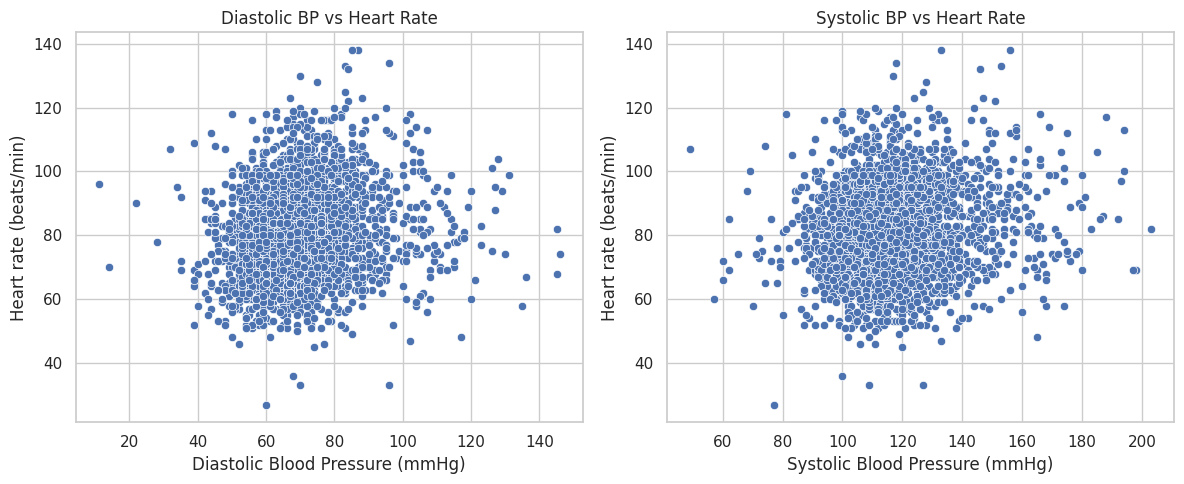

In [65]:
plt.figure(figsize=(12, 5))

# Diastolic BP vs Heart Rate
plt.subplot(1, 2, 1)
sns.scatterplot(x='Physical-Diastolic_BP', y='Physical-HeartRate', data=train)
plt.title('Diastolic BP vs Heart Rate')
plt.xlabel('Diastolic Blood Pressure (mmHg)')
plt.ylabel('Heart rate (beats/min)')

# Systolic BP vs Heart Rate
plt.subplot(1, 2, 2)
sns.scatterplot(x='Physical-Systolic_BP', y='Physical-HeartRate', data=train)
plt.title('Systolic BP vs Heart Rate')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Heart rate (beats/min)')

plt.tight_layout()
plt.show()

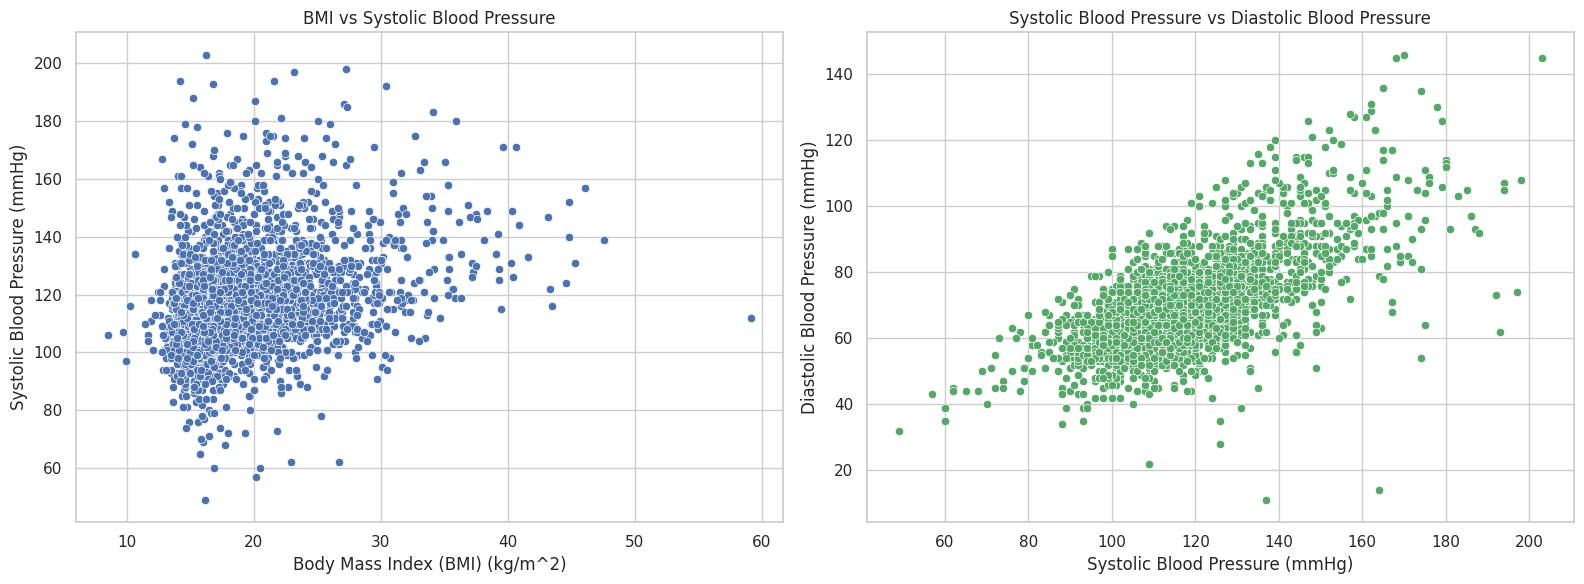

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BMI vs Systolic Blood Pressure
sns.scatterplot(x='Physical-BMI', y='Physical-Systolic_BP', data=train, ax=axes[0], color='b')
axes[0].set_title('BMI vs Systolic Blood Pressure')
axes[0].set_xlabel('Body Mass Index (BMI) (kg/m^2)')
axes[0].set_ylabel('Systolic Blood Pressure (mmHg)')

# Systolic Blood Pressure vs Diastolic Blood Pressure
sns.scatterplot(
    x='Physical-Systolic_BP', y='Physical-Diastolic_BP',
    data=train, ax=axes[1], color='g'
)
axes[1].set_title('Systolic Blood Pressure vs Diastolic Blood Pressure')
axes[1].set_xlabel('Systolic Blood Pressure (mmHg)')
axes[1].set_ylabel('Diastolic Blood Pressure (mmHg)')

plt.tight_layout()
plt.show()

In [67]:
normal_ranges = {
    'Physical-BMI': (18.5, 24.9),
    'Physical-Height': (100, 193),
    'Physical-Weight': (20, 120),
    'Physical-Waist_Circumference': (50, 90),
    'Physical-Diastolic_BP': (60, 80),
    'Physical-HeartRate': (60, 100),
    'Physical-Systolic_BP': (90, 120)
}

def count_out_of_range(data, column, low, high):
    return ((data[column] < low) | (data[column] > high)).sum

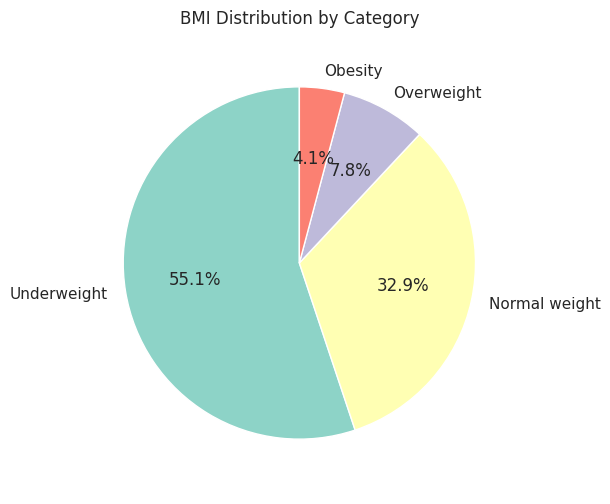

In [68]:
bmi_categories = [
    ('Underweight', train['Physical-BMI'] < 18.5),
    ('Normal weight', (train['Physical-BMI'] >= 18.5) & (train['Physical-BMI'] <= 24.9)),
    ('Overweight', (train['Physical-BMI'] >= 25) & (train['Physical-BMI'] <= 29.9)),
    ('Obesity', train['Physical-BMI'] >= 30)
]
bmi_category_counts = {label: condition.sum() for label, condition in bmi_categories}

plt.figure(figsize=(5, 6))
plt.pie(bmi_category_counts.values(),
        labels=bmi_category_counts.keys(),
        autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Set3.colors)
plt.title('BMI Distribution by Category')
plt.axis('equal')
plt.show()


In [69]:
train[train['Physical-BMI'] < 12][cols + ['Basic_Demos-Age']].sort_values(by = 'Physical-BMI')

,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Basic_Demos-Age
2848,8.523273,149.860,19.141582,NaN,68.0,77.0,106.0,8
1952,9.694718,149.860,21.772416,NaN,64.0,86.0,107.0,7
3463,9.960144,152.400,23.133192,NaN,48.0,73.0,97.0,6
3324,10.282698,147.320,22.316726,NaN,72.0,72.0,116.0,6
1707,10.676487,162.560,28.213422,NaN,99.0,90.0,134.0,7
3143,11.468414,131.318,19.776611,NaN,59.0,77.0,110.0,8
1700,11.676989,167.005,32.567906,NaN,50.0,90.0,106.0,10
3636,11.713943,139.700,22.861037,NaN,58.0,99.0,104.0,7
1307,11.750716,112.522,14.877818,48.26,NaN,77.0,NaN,7
156,11.916424,149.860,26.761928,71.12,76.0,83.0,118.0,11


In [70]:
train[train['Physical-Systolic_BP'] > 160][cols + ['Basic_Demos-Age']].sort_values(by = 'Physical-Systolic_BP')

,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Basic_Demos-Age
1794,14.036968,121.920,20.865232,NaN,111.0,69.0,161.0,8
284,21.719865,152.527,50.530149,NaN,96.0,99.0,161.0,12
3032,14.272220,129.540,23.949658,NaN,104.0,89.0,161.0,9
2401,17.245599,129.540,28.939170,NaN,87.0,103.0,161.0,8
882,16.398111,124.460,25.401152,NaN,127.0,95.0,161.0,6
...,...,...,...,...,...,...,...,...
1019,14.172653,124.460,21.953853,60.96,107.0,113.0,194.0,8
2777,21.625191,134.620,39.190349,NaN,105.0,100.0,194.0,7
2549,23.154916,169.926,66.859461,NaN,74.0,69.0,197.0,17
436,27.260353,175.260,83.733083,NaN,108.0,69.0,198.0,19


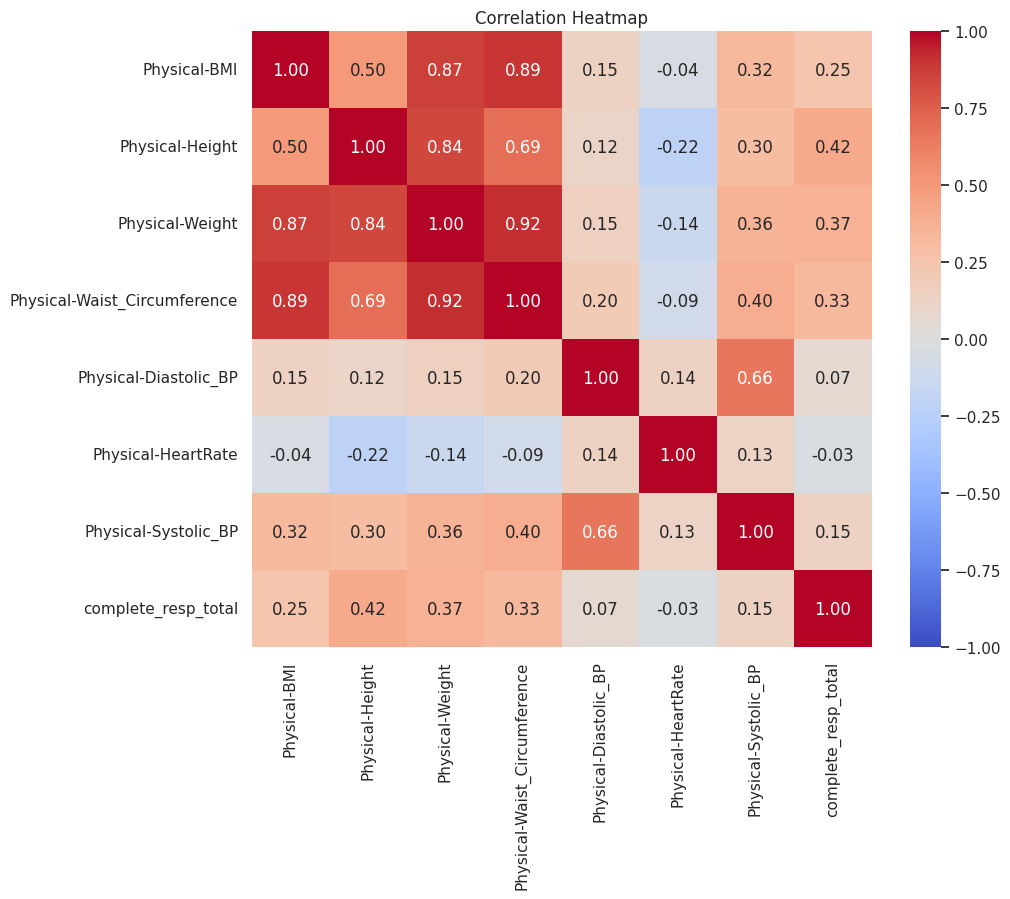

In [71]:
data_subset = train[cols + ['complete_resp_total']]

corr_matrix = data_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [72]:
data_dict[data_dict['Instrument'] == 'Bio-electric Impedance Analysis']

,Instrument,Field,Description,Type,Values,Value Labels
33,Bio-electric Impedance Analysis,BIA-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
34,Bio-electric Impedance Analysis,BIA-BIA_Activity_Level_num,Activity Level,categorical int,"1,2,3,4,5","1=Very Light, 2=Light, 3=Moderate, 4=Heavy, 5=..."
35,Bio-electric Impedance Analysis,BIA-BIA_BMC,Bone Mineral Content,float,NaN,NaN
36,Bio-electric Impedance Analysis,BIA-BIA_BMI,Body Mass Index,float,NaN,NaN
37,Bio-electric Impedance Analysis,BIA-BIA_BMR,Basal Metabolic Rate,float,NaN,NaN
38,Bio-electric Impedance Analysis,BIA-BIA_DEE,Daily Energy Expenditure,float,NaN,NaN
39,Bio-electric Impedance Analysis,BIA-BIA_ECW,Extracellular Water,float,NaN,NaN
40,Bio-electric Impedance Analysis,BIA-BIA_FFM,Fat Free Mass,float,NaN,NaN
41,Bio-electric Impedance Analysis,BIA-BIA_FFMI,Fat Free Mass Index,float,NaN,NaN
42,Bio-electric Impedance Analysis,BIA-BIA_FMI,Fat Mass Index,float,NaN,NaN


In [73]:
bia_data_dict = data_dict[data_dict['Instrument'] == 'Bio-electric Impedance Analysis']
categorical_columns = bia_data_dict[bia_data_dict['Type'] == 'categorical int']['Field'].tolist()
continuous_columns = bia_data_dict[bia_data_dict['Type'] == 'float']['Field'].tolist()

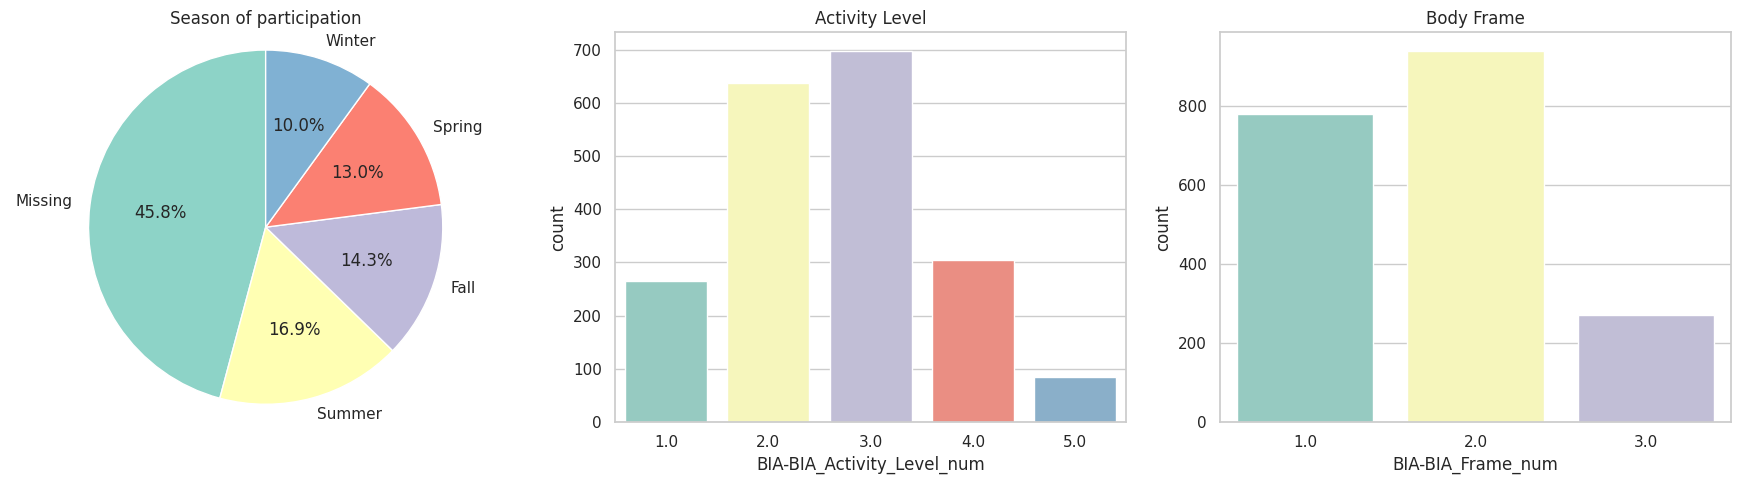

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Season
season_counts = train['BIA-Season'].value_counts(normalize=True)
axes[0].pie(
    season_counts, 
    labels=season_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("Set3")
)
axes[0].set_title(
    f"{bia_data_dict[bia_data_dict['Field'] == 'BIA-Season']['Description'].values[0]}"
)
axes[0].axis('equal')

# Other categorical columns
for idx, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=train, palette="Set3", ax=axes[idx+1])
    axes[idx+1].set_title(data_dict[data_dict['Field'] == col]['Description'].values[0])

plt.tight_layout()
plt.show()

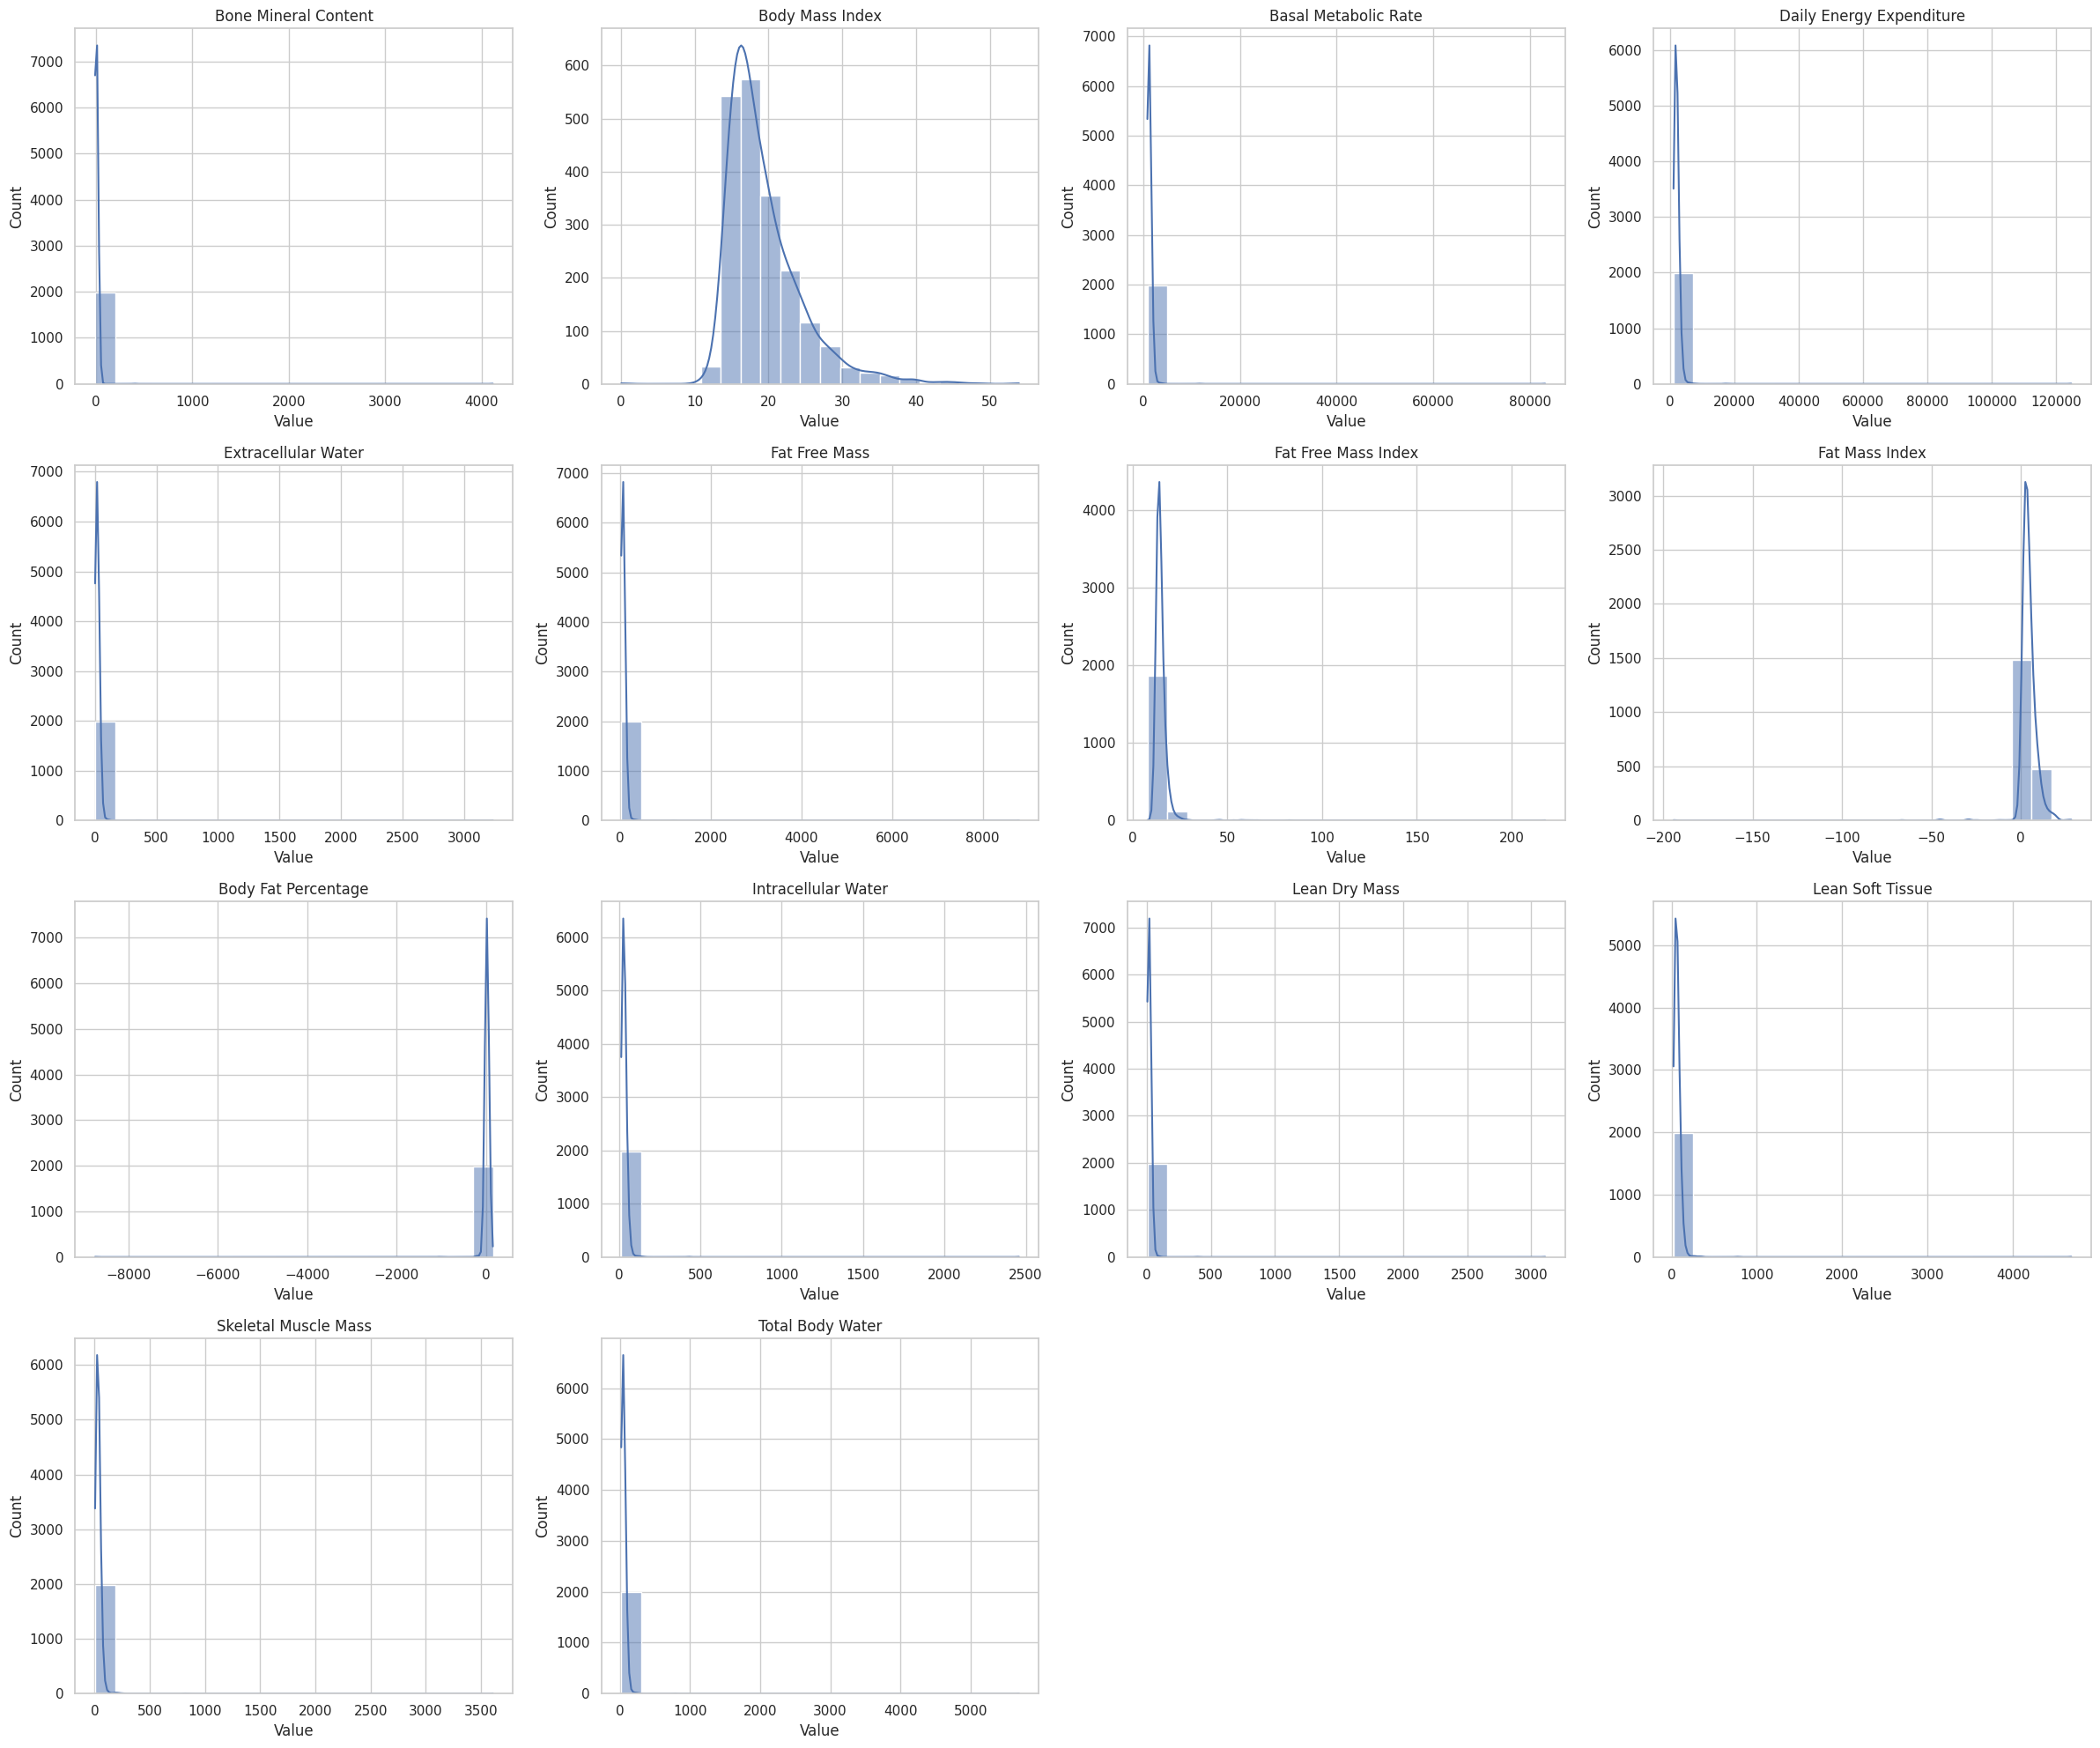

In [75]:
plt.figure(figsize=(24, 20))

for idx, col in enumerate(continuous_columns):
    plt.subplot(4, 4, idx + 1)
    sns.histplot(train[col].dropna(), bins=20, kde=True)
    plt.title(data_dict[data_dict['Field'] == col]['Description'].values[0])
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

In [76]:
calculate_stats(train, continuous_columns)

,count,mean,std,min,25%,50%,75%,max,missing
BIA-BIA_BMC,1991.0,6.719826,92.586325,-7.789610,2.966905,3.92272,5.460925,4115.3600,1969
BIA-BIA_BMI,1991.0,19.367048,5.047848,0.048267,15.913600,17.96650,21.461100,53.9243,1969
BIA-BIA_BMR,1991.0,1237.018187,1872.383246,813.397000,1004.710000,1115.38000,1310.360000,83152.2000,1969
BIA-BIA_DEE,1991.0,2064.693747,2836.246272,1073.450000,1605.785000,1863.98000,2218.145000,124728.0000,1969
BIA-BIA_ECW,1991.0,20.825346,73.266287,1.789450,11.109550,15.92800,25.162200,3233.0000,1969
BIA-BIA_FFM,1991.0,74.021708,199.433753,28.900400,49.278100,61.06620,81.833800,8799.0800,1969
BIA-BIA_FFMI,1991.0,15.030554,5.792505,7.864850,13.408000,14.09250,15.430950,217.7710,1969
BIA-BIA_FMI,1991.0,4.336495,6.356402,-194.163000,2.306915,3.69863,5.987690,28.2515,1969
BIA-BIA_Fat,1991.0,16.855020,199.372119,-8745.080000,8.602395,16.17460,30.273100,153.8200,1969
BIA-BIA_ICW,1991.0,33.173380,56.272346,14.489000,24.463500,28.85580,35.475700,2457.9100,1969


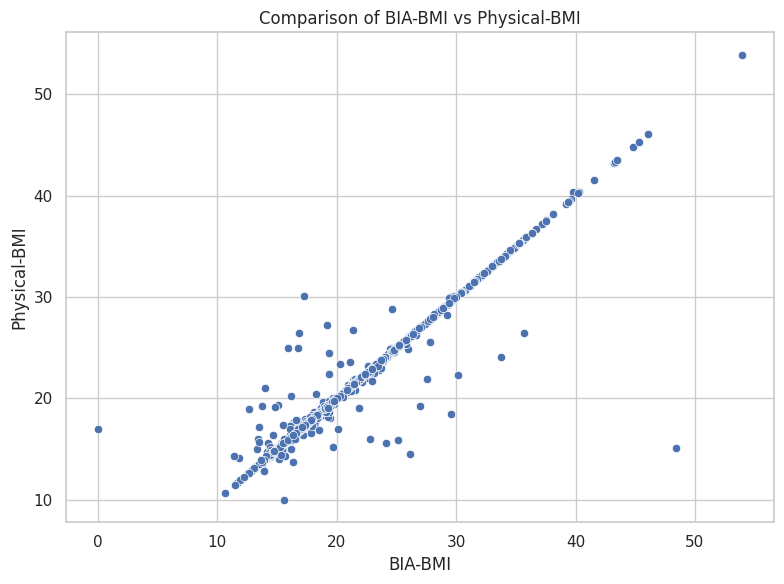

In [77]:
bmi_data = train[['BIA-BIA_BMI', 'Physical-BMI']].dropna()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='BIA-BIA_BMI', y='Physical-BMI',
    data=bmi_data,
    color='b'
)
plt.title('Comparison of BIA-BMI vs Physical-BMI')
plt.xlabel('BIA-BMI')
plt.ylabel('Physical-BMI')

plt.tight_layout()
plt.show()

In [78]:
bmi_measures = train[['BIA-Season', 'Physical-Season']].dropna()
bmi_measures.groupby(['BIA-Season', 'Physical-Season']).size().reset_index(name='Count')

,BIA-Season,Physical-Season,Count
0,Fall,Fall,407
1,Fall,Missing,6
2,Fall,Spring,15
3,Fall,Summer,131
4,Fall,Winter,8
5,Missing,Fall,294
6,Missing,Missing,635
7,Missing,Spring,309
8,Missing,Summer,277
9,Missing,Winter,300


In [79]:
groups.get('FitnessGram Vitals and Treadmill', [])

['Fitness_Endurance-Season',
 'Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec']

In [80]:
data = train[train['Fitness_Endurance-Max_Stage'].notnull()]
age_range = data['Basic_Demos-Age']
print(
    f"Age range for participants with Fitness_Endurance-Max_Stage data:"
    f" {age_range.min()} - {age_range.max()} years"
)

Age range for participants with Fitness_Endurance-Max_Stage data: 6 - 12 years


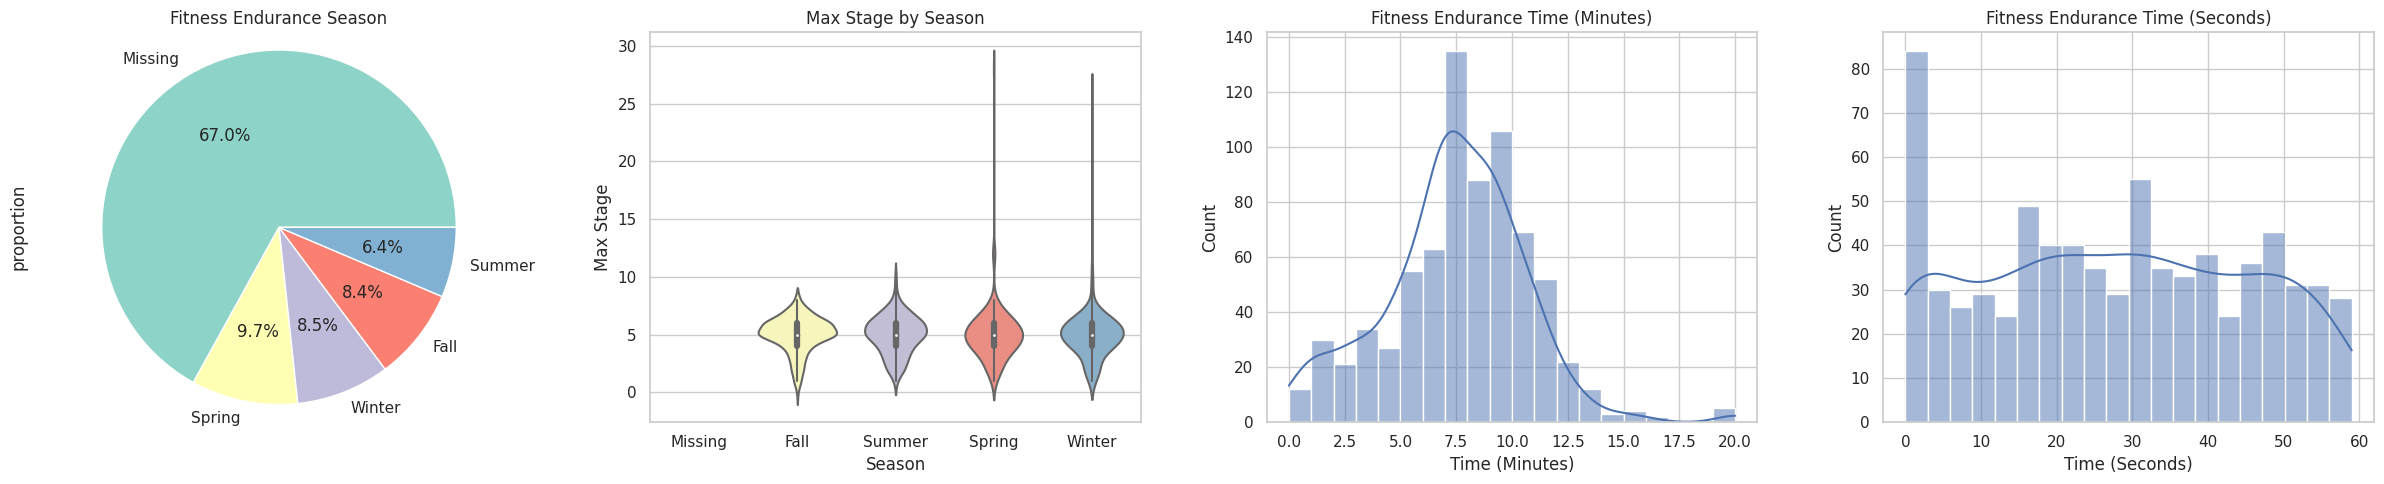

In [81]:
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# Fitness Endurance Season
train['Fitness_Endurance-Season'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', colors=plt.cm.Set3.colors, ax=axes[0]
)
axes[0].set_title('Fitness Endurance Season')
axes[0].axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Box plot for Max Stage by Season
sns.violinplot(
    x='Fitness_Endurance-Season',
    y='Fitness_Endurance-Max_Stage',
    data=train, palette="Set3",
    ax=axes[1]
)
axes[1].set_title('Max Stage by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Max Stage')
# Fitness Endurance Time (Minutes)
sns.histplot(train['Fitness_Endurance-Time_Mins'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Fitness Endurance Time (Minutes)')
axes[2].set_xlabel('Time (Minutes)')

# Fitness Endurance Time (Seconds)
sns.histplot(train['Fitness_Endurance-Time_Sec'], bins=20, kde=True, ax=axes[3])
axes[3].set_title('Fitness Endurance Time (Seconds)')
axes[3].set_xlabel('Time (Seconds)')

plt.tight_layout()
plt.show()

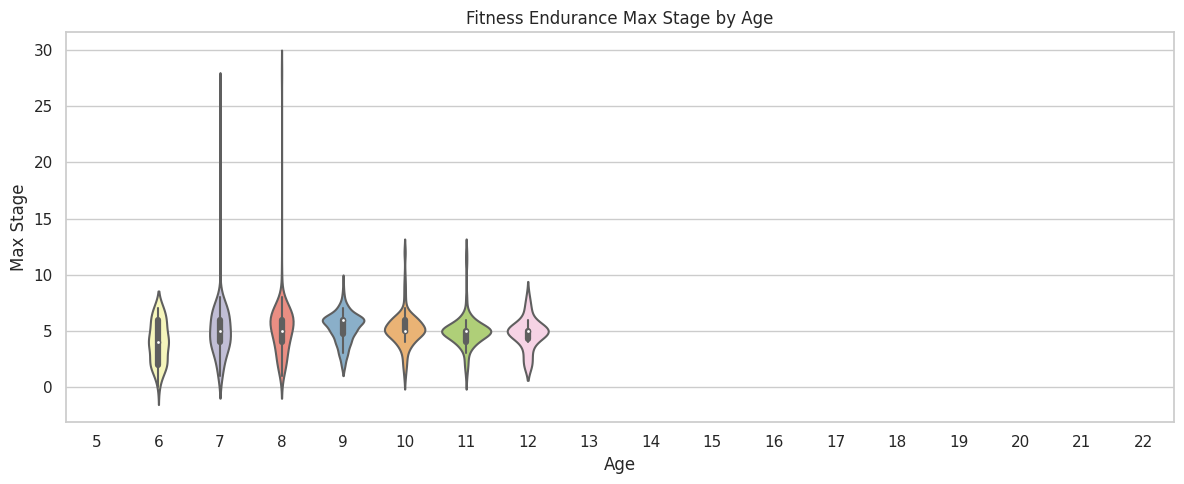

In [82]:
plt.figure(figsize=(12, 5))

sns.violinplot(x='Basic_Demos-Age', y='Fitness_Endurance-Max_Stage', data=train, palette="Set3")
plt.title('Fitness Endurance Max Stage by Age')
plt.xlabel('Age')
plt.ylabel('Max Stage')

plt.tight_layout()
plt.show()

In [83]:
cols = [
    'Fitness_Endurance-Max_Stage',
    'Fitness_Endurance-Time_Mins',
    'Fitness_Endurance-Time_Sec'
]
calculate_stats(train, cols)

,count,mean,std,min,25%,50%,75%,max,missing
Fitness_Endurance-Max_Stage,743.0,4.989233,2.014072,0.0,4.00,5.0,6.0,28.0,3217
Fitness_Endurance-Time_Mins,740.0,7.370270,3.189662,0.0,6.00,7.0,9.0,20.0,3220
Fitness_Endurance-Time_Sec,740.0,27.581081,17.707751,0.0,12.75,28.0,43.0,59.0,3220


In [84]:
train[
    (train['Fitness_Endurance-Max_Stage'].notna()) & 
    (train['Fitness_Endurance-Time_Mins'].isna() | 
     train['Fitness_Endurance-Time_Sec'].isna())
][cols]

,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec
420,4.0,6.0,NaN
1470,26.0,NaN,NaN
2907,1.0,NaN,26.0
3666,2.0,NaN,NaN


In [85]:
train.loc[
    (train['Fitness_Endurance-Max_Stage'].notna()) & 
    (train['Fitness_Endurance-Time_Mins'].isna() | 
     train['Fitness_Endurance-Time_Sec'].isna()), cols
] = np.nan

In [86]:
train['Fitness_Endurance-Total_Time_Sec'] = train[
    'Fitness_Endurance-Time_Mins'
] * 60 + train['Fitness_Endurance-Time_Sec']

In [87]:
calculate_stats(train, ['Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Total_Time_Sec'])

,count,mean,std,min,25%,50%,75%,max,missing
Fitness_Endurance-Max_Stage,739.0,4.971583,1.856069,0.0,4.0,5.0,6.0,28.0,3221
Fitness_Endurance-Total_Time_Sec,739.0,469.910690,188.716073,5.0,362.0,476.0,590.5,1200.0,3221


In [88]:
data_dict[data_dict['Instrument'] == 'FitnessGram Child']


,Instrument,Field,Description,Type,Values,Value Labels
18,FitnessGram Child,FGC-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
19,FitnessGram Child,FGC-FGC_CU,Curl up total,int,NaN,NaN
20,FitnessGram Child,FGC-FGC_CU_Zone,Curl up fitness zone,categorical int,"0,1","0=Needs Improvement, 1=Healthy Fitness Zone"
21,FitnessGram Child,FGC-FGC_GSND,Grip Strength total (non-dominant),float,NaN,NaN
22,FitnessGram Child,FGC-FGC_GSND_Zone,Grip Strength fitness zone (non-dominant),categorical int,"1,2,3","1=Weak, 2=Normal, 3=Strong"
23,FitnessGram Child,FGC-FGC_GSD,Grip Strength total (dominant),float,NaN,NaN
24,FitnessGram Child,FGC-FGC_GSD_Zone,Grip Strength fitness zone (dominant),categorical int,"1,2,3","1=Weak, 2=Normal, 3=Strong"
25,FitnessGram Child,FGC-FGC_PU,Push-up total,int,NaN,NaN
26,FitnessGram Child,FGC-FGC_PU_Zone,Push-up fitness zone,categorical int,"0,1","0=Needs Improvement, 1=Healthy Fitness Zone"
27,FitnessGram Child,FGC-FGC_SRL,Sit & Reach total (left side),float,NaN,NaN


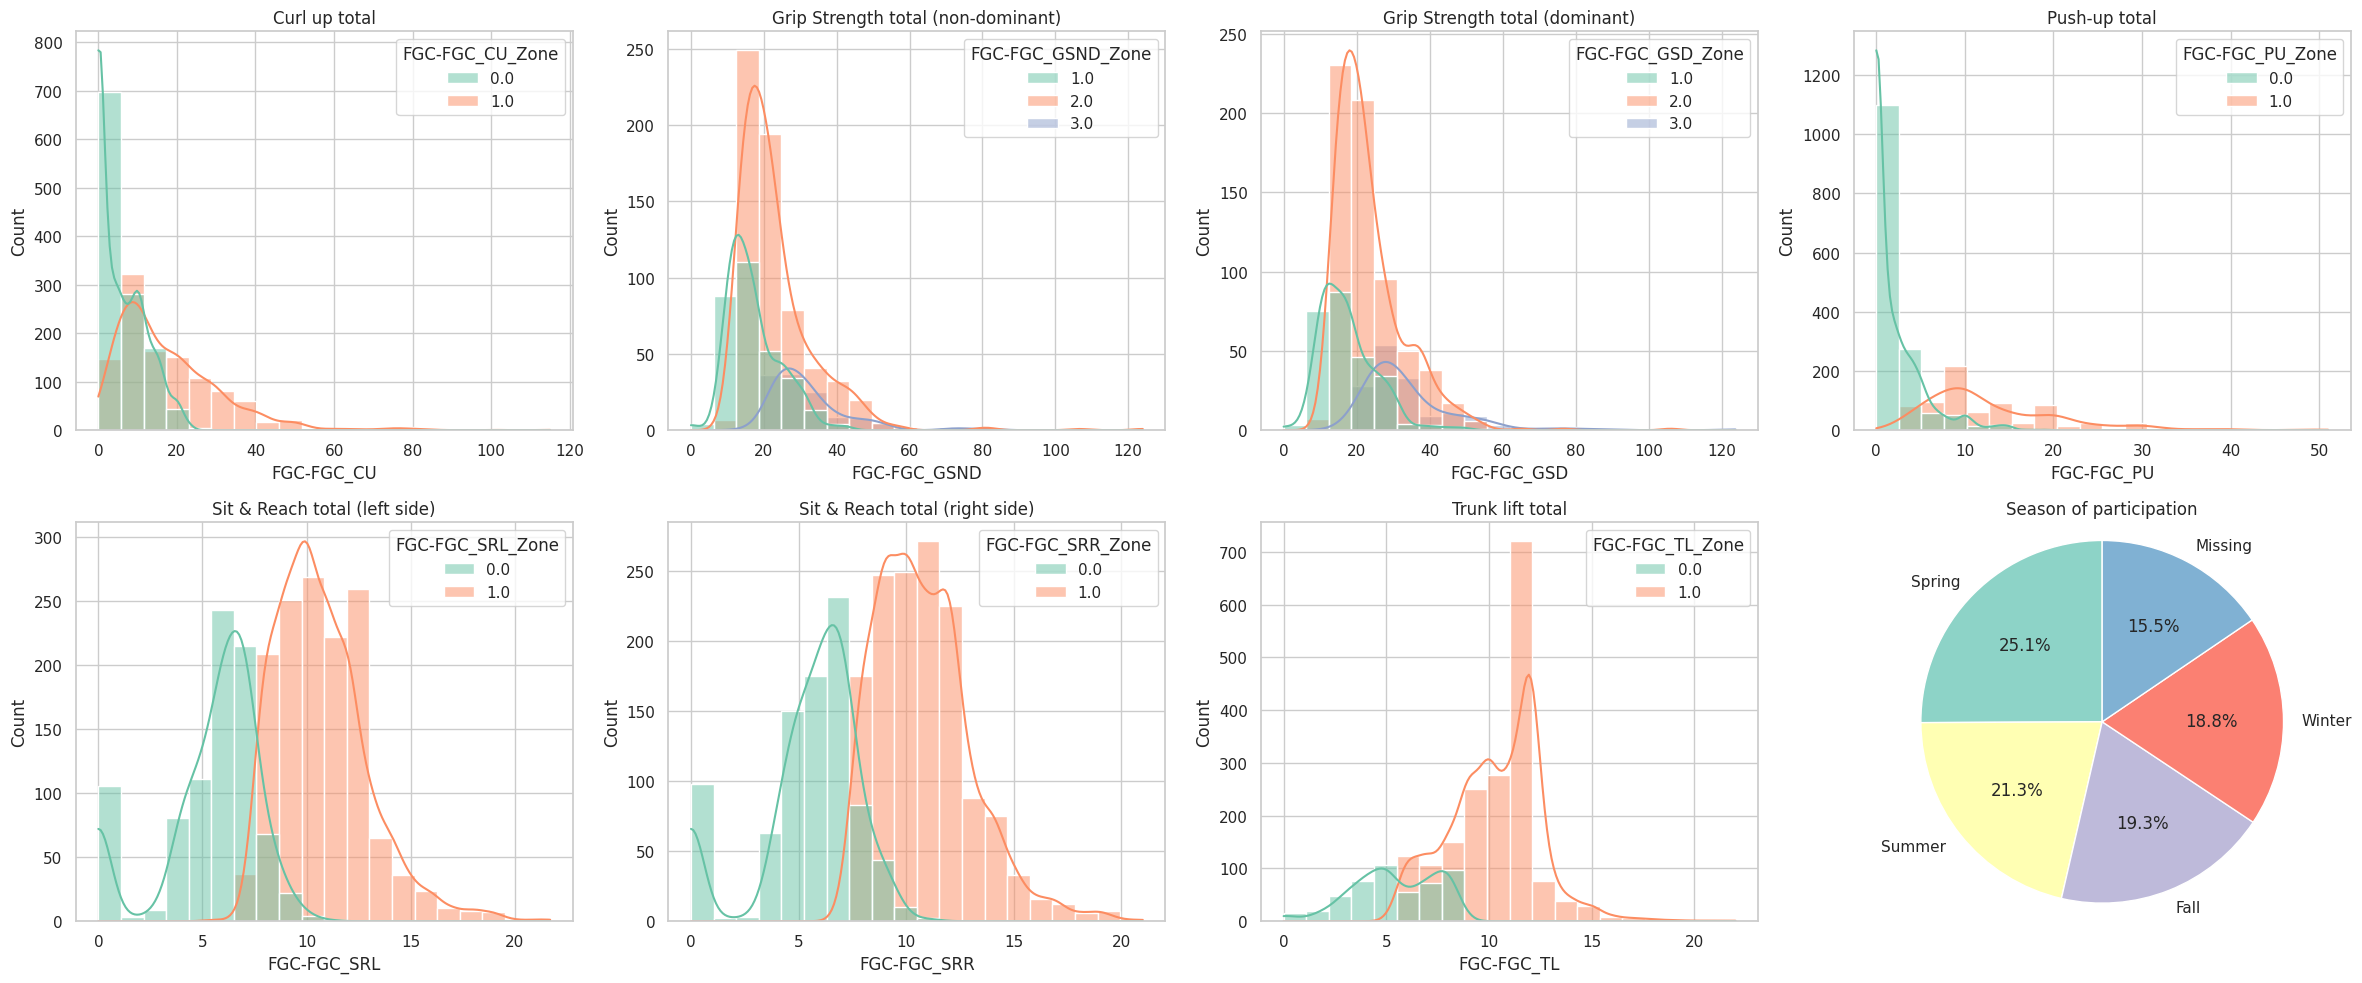

In [89]:
fgc_data_dict = data_dict[data_dict['Instrument'] == 'FitnessGram Child']

fgc_columns = []

for index, row in fgc_data_dict.iterrows():
    if '_Zone' not in row['Field']:
        measure_field = row['Field']
        measure_desc = row['Description']
        
        zone_field = measure_field + '_Zone'
        zone_row = fgc_data_dict[fgc_data_dict['Field'] == zone_field]
        
        if not zone_row.empty:
            zone_desc = zone_row['Description'].values[0]
            fgc_columns.append((measure_field, zone_field, measure_desc, zone_desc))
            
fig, axes = plt.subplots(2, 4, figsize=(24, 10))
for idx, (measure, zone, measure_desc, zone_desc) in enumerate(fgc_columns):
    row = idx // 4
    col = idx % 4
    
    sns.histplot(
        data=train, x=measure,
        hue=zone, bins=20, palette='Set2',
        ax=axes[row, col], kde=True
    )
    axes[row, col].set_title(f'{measure_desc}')

season_counts = train['FGC-Season'].value_counts(normalize=True)
axes[1, 3].pie(
    season_counts, labels=season_counts.index,
    autopct='%1.1f%%', startangle=90,
    colors=sns.color_palette("Set3")
)
axes[1, 3].set_title('Season of participation')
axes[1, 3].axis('equal') 

plt.tight_layout()
plt.show()

In [90]:
measurement_columns = [measure for measure, _, _, _ in fgc_columns]
calculate_stats(train, measurement_columns)

,count,mean,std,min,25%,50%,75%,max,missing
FGC-FGC_CU,2322.0,11.259690,11.807781,0.0,3.0,9.00,15.750,115.0,1638
FGC-FGC_GSND,1074.0,22.420438,10.833995,0.0,15.1,20.05,26.600,124.0,2886
FGC-FGC_GSD,1074.0,23.518622,11.148951,0.0,16.2,21.20,28.175,123.8,2886
FGC-FGC_PU,2310.0,5.579654,7.390161,0.0,0.0,3.00,9.000,51.0,1650
FGC-FGC_SRL,2305.0,8.694924,3.429301,0.0,7.0,9.00,11.000,21.7,1655
FGC-FGC_SRR,2307.0,8.805635,3.422167,0.0,7.0,9.00,11.000,21.0,1653
FGC-FGC_TL,2324.0,9.252775,2.988863,0.0,7.0,10.00,12.000,22.0,1636


In [91]:
def compute_min_max_by_sex(train, sex, fgc_columns):
    results = []
    
    for measure, zone, _, _ in fgc_columns:
        sorted_zones = sorted(train[zone].dropna().unique())
        
        for zone_value in sorted_zones:
            data = train[(train[zone] == zone_value) & 
                         (train['Basic_Demos-Sex'] == sex)][measure]
            
            if not data.empty:
                min_val, max_val = data.min(), data.max()
                results.append({
                    'Zone': int(zone_value),
                    'Measure': measure,
                    'Min-Max': f'{min_val} - {max_val}'
                })
    
    df = pd.DataFrame(results).pivot_table(
        index='Zone', columns='Measure', values='Min-Max', aggfunc='first'
    )
    
    return df

In [92]:
compute_min_max_by_sex(train, 'Male', fgc_columns)

Measure,FGC-FGC_CU,FGC-FGC_GSD,FGC-FGC_GSND,FGC-FGC_PU,FGC-FGC_SRL,FGC-FGC_SRR,FGC-FGC_TL
Zone,,,,,,,
0,0.0 - 23.0,NaN,NaN,0.0 - 19.0,0.0 - 7.75,0.0 - 8.0,0.0 - 8.2
1,2.0 - 85.0,0.0 - 46.8,0.0 - 43.0,3.0 - 51.0,7.5 - 20.0,7.0 - 19.0,5.5 - 21.0
2,NaN,12.7 - 106.0,12.6 - 106.4,NaN,NaN,NaN,NaN
3,NaN,22.5 - 123.8,22.6 - 81.8,NaN,NaN,NaN,NaN


In [93]:
compute_min_max_by_sex(train, 'Female', fgc_columns)

Measure,FGC-FGC_CU,FGC-FGC_GSD,FGC-FGC_GSND,FGC-FGC_PU,FGC-FGC_SRL,FGC-FGC_SRR,FGC-FGC_TL
Zone,,,,,,,
0,0.0 - 17.0,NaN,NaN,0.0 - 6.0,0.0 - 11.0,0.0 - 11.0,0.0 - 8.5
1,2.0 - 115.0,5.1 - 49.8,0.0 - 36.2,3.0 - 50.0,5.5 - 21.7,8.5 - 21.0,5.5 - 22.0
2,NaN,9.5 - 65.2,9.0 - 124.0,NaN,NaN,NaN,NaN
3,NaN,16.3 - 88.8,15.5 - 74.0,NaN,NaN,NaN,NaN


In [94]:
results_male = []

for measure, zone, _, _ in fgc_columns:
    sorted_zones = sorted(train[zone].dropna().unique())
    for zone_value in sorted_zones:
        age_sex_data_by_zone = train[train[zone] == zone_value][
            ['Basic_Demos-Age', 'Basic_Demos-Sex', measure]
        ]
        unique_ages = age_sex_data_by_zone['Basic_Demos-Age'].dropna().unique()

        for age in sorted(unique_ages):
            age_sex_data = age_sex_data_by_zone[
                (age_sex_data_by_zone['Basic_Demos-Age'] == age) &
                (age_sex_data_by_zone['Basic_Demos-Sex'] == 'Male')
            ][measure]
            
            if not age_sex_data.empty:
                min_val, max_val = age_sex_data.min(), age_sex_data.max()
                results_male.append({
                    'Age': age,
                    'Sex': 'Male',
                    'Zone': zone_value,
                    'Measure': measure,
                    'Min-Max': f'{min_val} - {max_val}'
                })
df_male = pd.DataFrame(results_male).pivot_table(
    index=['Age', 'Sex', 'Zone'], columns='Measure', values='Min-Max', aggfunc='first'
)

df_male

Measure         FGC-FGC_CU   FGC-FGC_GSD  FGC-FGC_GSND   FGC-FGC_PU  \
Age Sex  Zone                                                         
5   Male 0.0     0.0 - 1.0           NaN           NaN    0.0 - 2.0   
         1.0    2.0 - 13.0           NaN           NaN    3.0 - 8.0   
6   Male 0.0     0.0 - 1.0           NaN           NaN    0.0 - 2.0   
         1.0    2.0 - 40.0           NaN           NaN   3.0 - 20.0   
7   Male 0.0     0.0 - 3.0           NaN           NaN    0.0 - 3.0   
         1.0    2.0 - 30.0           NaN           NaN   3.0 - 24.0   
8   Male 0.0     0.0 - 5.0           NaN           NaN    0.0 - 5.0   
         1.0    4.0 - 30.0           NaN           NaN   4.0 - 40.0   
9   Male 0.0    0.0 - 10.0           NaN           NaN    0.0 - 5.0   
         1.0    6.0 - 43.0   11.1 - 11.1           NaN   5.0 - 30.0   
         2.0           NaN   13.3 - 13.3   12.7 - 13.1          NaN   
10  Male 0.0    0.0 - 11.0           NaN           NaN    0.0 - 6.0   
         1.0    9.0 - 75.0    0.0 - 16.1    0.0 - 15.1   6.0 - 37.0   
         2.0           NaN   12.7 - 44.0   12.6 - 34.0          NaN   
         3.0           NaN   25.9 - 29.3   22.9 - 50.2          NaN   
11  Male 0.0    0.0 - 14.0           NaN           NaN    0.0 - 7.0   
         1.0   12.0 - 50.0    6.3 - 24.6    8.6 - 24.6   7.0 - 50.0   
         2.0           NaN   12.8 - 35.4   12.7 - 49.0          NaN   
         3.0           NaN   22.5 - 53.6   22.6 - 49.8          NaN   
12  Male 0.0    0.0 - 17.0           NaN           NaN    0.0 - 9.0   
         1.0   15.0 - 45.0    9.9 - 40.6    9.9 - 41.8   8.0 - 30.0   
         2.0           NaN   13.1 - 49.0   12.6 - 48.2          NaN   
         3.0           NaN   22.8 - 46.8   23.0 - 41.7          NaN   
13  Male 0.0    0.0 - 20.0           NaN           NaN   0.0 - 19.0   
         1.0   18.0 - 80.0   11.3 - 37.2    8.9 - 31.4  10.0 - 40.0   
         2.0           NaN   19.1 - 47.8   17.7 - 45.6          NaN   
         3.0           NaN   32.5 - 42.2   31.6 - 42.6          NaN   
14  Male 0.0    0.0 - 23.0           NaN           NaN   0.0 - 13.0   
         1.0   24.0 - 80.0   12.8 - 46.8   11.5 - 43.0  13.0 - 37.0   
         2.0           NaN   19.7 - 42.9   20.2 - 56.8          NaN   
         3.0           NaN   31.5 - 79.2   31.8 - 81.8          NaN   
15  Male 0.0    0.0 - 23.0           NaN           NaN   0.0 - 14.0   
         1.0   24.0 - 85.0    0.0 - 43.4    0.0 - 39.4  15.0 - 49.0   
         2.0           NaN   22.6 - 76.8   17.5 - 80.4          NaN   
         3.0           NaN   28.1 - 49.6   33.6 - 47.1          NaN   
16  Male 0.0    0.0 - 23.0           NaN           NaN   0.0 - 15.0   
         1.0   24.0 - 64.0   16.1 - 32.3   15.3 - 32.0  16.0 - 39.0   
         2.0           NaN   29.2 - 47.9   21.6 - 46.6          NaN   
         3.0           NaN   46.6 - 57.6   44.0 - 47.4          NaN   
17  Male 0.0    0.0 - 22.0           NaN           NaN   0.0 - 15.0   
         1.0   24.0 - 78.0   11.1 - 32.3   12.4 - 31.9  18.0 - 47.0   
         2.0           NaN  17.8 - 106.0  30.4 - 106.4          NaN   
         3.0           NaN  34.4 - 123.8   33.3 - 53.7          NaN   
18  Male 0.0    0.0 - 23.0           NaN           NaN   5.0 - 14.0   
         1.0   25.0 - 40.0           NaN   28.4 - 33.8  23.0 - 51.0   
         2.0           NaN   24.4 - 52.0   20.2 - 42.1          NaN   
         3.0           NaN   28.4 - 28.4   23.4 - 52.7          NaN   
19  Male 0.0    8.0 - 20.0           NaN           NaN    8.0 - 8.0   
         1.0           NaN   23.9 - 31.1   26.0 - 26.1  18.0 - 18.0   
20  Male 0.0           NaN           NaN           NaN  17.0 - 17.0   
         1.0   34.0 - 34.0           NaN           NaN          NaN   
         3.0           NaN   56.8 - 56.8   52.5 - 52.5          NaN   
21  Male 0.0   20.0 - 20.0           NaN           NaN  11.0 - 11.0   
         1.0   30.0 - 30.0           NaN   23.3 - 23.3  20.0 - 20.0   
         2.0           N

In [95]:
age_ranges = []

for measure in measurement_columns:
    valid_rows = train[~train[measure].isna()]
    
    min_age = valid_rows['Basic_Demos-Age'].min()
    max_age = valid_rows['Basic_Demos-Age'].max()
    
    age_ranges.append({
        'Measurement': measure,
        'Min Age': min_age,
        'Max Age': max_age
    })

age_ranges_df = pd.DataFrame(age_ranges)
age_ranges_df

,Measurement,Min Age,Max Age
0,FGC-FGC_CU,5,21
1,FGC-FGC_GSND,6,21
2,FGC-FGC_GSD,6,21
3,FGC-FGC_PU,5,21
4,FGC-FGC_SRL,5,21
5,FGC-FGC_SRR,5,21
6,FGC-FGC_TL,5,21


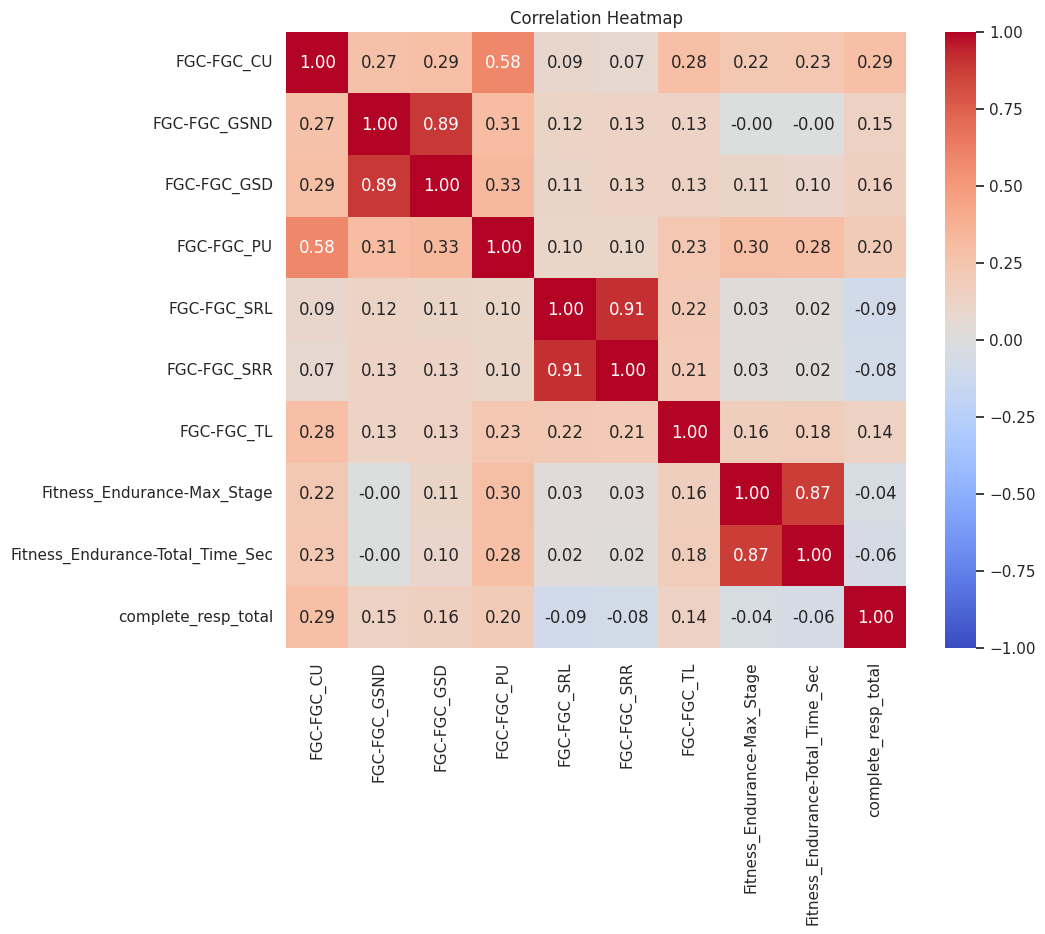

In [96]:
cols = [col for col in train.columns if col.startswith('FGC-') 
        and 'Zone' not in col and 'Season' not in col]
cols.extend(['Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Total_Time_Sec'])

data_subset = train[cols + ['complete_resp_total']]

corr_matrix = data_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

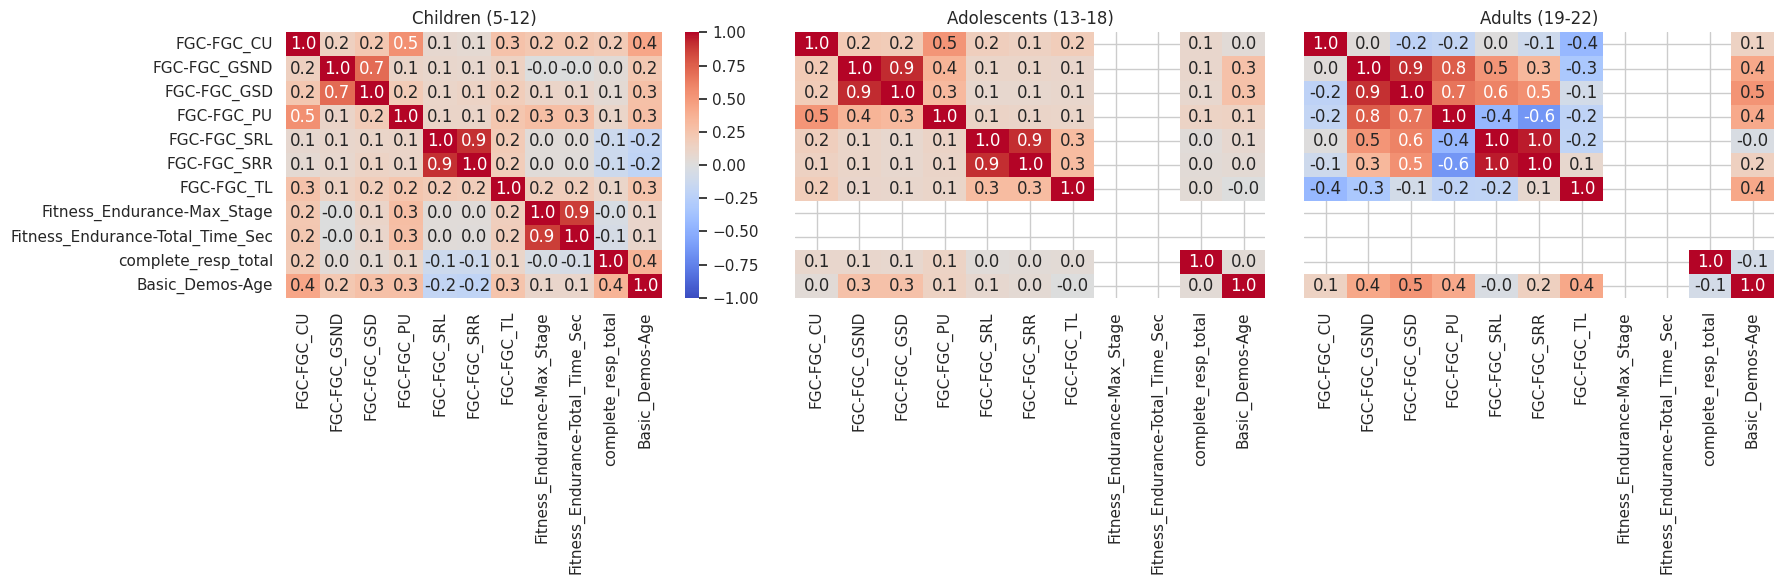

In [97]:
age_groups = train['Age Group'].unique()

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, age_group in enumerate(age_groups):
    group_data = train[train['Age Group'] == age_group]
    corr_matrix = group_data[cols + ['complete_resp_total', 'Basic_Demos-Age']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f',
                vmin=-1, vmax=1, ax=axes[i], cbar=i == 0)
    axes[i].set_title(f'{age_group}')

plt.tight_layout()
plt.show()

In [98]:
train[
    (train['Age Group'] == 'Adults (19-22)') &
    (train['complete_resp_total'].notna()) &
    (train[cols].notna().any(axis=1))
][cols + ['complete_resp_total', 'Basic_Demos-Age']]

,FGC-FGC_CU,FGC-FGC_GSND,FGC-FGC_GSD,FGC-FGC_PU,FGC-FGC_SRL,FGC-FGC_SRR,FGC-FGC_TL,Fitness_Endurance-Max_Stage,Fitness_Endurance-Total_Time_Sec,complete_resp_total,Basic_Demos-Age
1483,34.0,52.5,56.8,17.0,13.0,12.0,6.0,NaN,NaN,1.0,20
